In [111]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Plot of some M dwarfs

In [2]:
# plt.figure(figsize=(8.5, 8.5))
# path = '/media/david/1tb_storage1/emergency_data/PyHammer-2.0.0/resources/templates/'
# sptypes = ['M0', 'M2', 'M4', 'M6', 'M8']
# nspec = len(sptypes) 
# cols = np.linspace(0, 1, nspec)

# for i, sptype in enumerate(sptypes):
#         specs = glob.glob('{}{}_+0.0_Dwarf.fits'.format(path, sptype))+glob.glob('{}{}.fits'.format(path, sptype))
#         if len(specs) > 0 :
#             data = fits.getdata(specs[0])
#             w, f = 10**data['Loglam'], data['Flux']
#             mask = (w < 9350) | (w > 9450)
#             f = f/np.max(data['Flux'][mask])+nspec-i
#             plt.plot(w, f)#, plt.cm.cool(cols[i]))
#             labpos= (np.mean(f[(w > 9500) & (w < 10000)]))+0.2 #position of the label just above the spectrum

#             plt.annotate(sptype, (0.9, labpos), xycoords=('axes fraction', 'data'), ha='left', va='bottom')
# plt.xlim(w[0], w[-1])

# plt.xlabel('Wavelength (\AA)', size=20)
# plt.ylabel('Normalised Flux+constant', size=20)
# plt.tight_layout()
# plt.savefig('plots/mdwarf_specs.png', facecolor='w', dpi=150)

In [125]:
# from scipy.io import readsav
soldat = Table.read('../../../hwo/Solar_1au_sed.csv')
sw, sf = soldat['WAVELENGTH'], soldat['FLUX']
# sol_spec =  readsav('../../stuff/Solar-data.idlsav')

# sw = sol_spec['wave']*10
# sf = sol_spec['flux']*100

In [4]:
r_t1 = 0.117*u.Rsun
r_674 = 0.35*u.Rsun
t_t1= 2560*u.K
t_674 = 3400*u.K
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)
d_674= 6.4*u.pc
# bb_scale = (u.Rsun**2 * t_sun**4)/(r_t1**2 * t_t1**4)*(d_t1/d_sun)**2
bb_scale = (u.Rsun**2 * t_sun**4)/(r_674**2 * t_674**4)*(d_674/d_sun)**2
print(bb_scale)

118568118309998.17


In [5]:
# path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v02_seds/'
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/'
specs = glob.glob('{}*/*adapt-var*'.format(path))
specs

['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ1132/hlsp_muscles_multi_multi_gj1132_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ699/hlsp_muscles_multi_multi_gj699_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_multi

In [6]:
stars = []


for j, spec in enumerate(specs):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
#     if star=='GJ674':
    print(star)
    stars.append(star)
#         w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #         wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
#         plt.plot(wn[wn< 4000], fn[wn< 4000])
#         plt.yscale('log')
#         plt.show()
    

GJ1132
GJ15A
GJ163
GJ649
GJ674
GJ676A
GJ699
GJ729
GJ849
L-980-5
LHS-2686
2MASS-J23062928-0502285


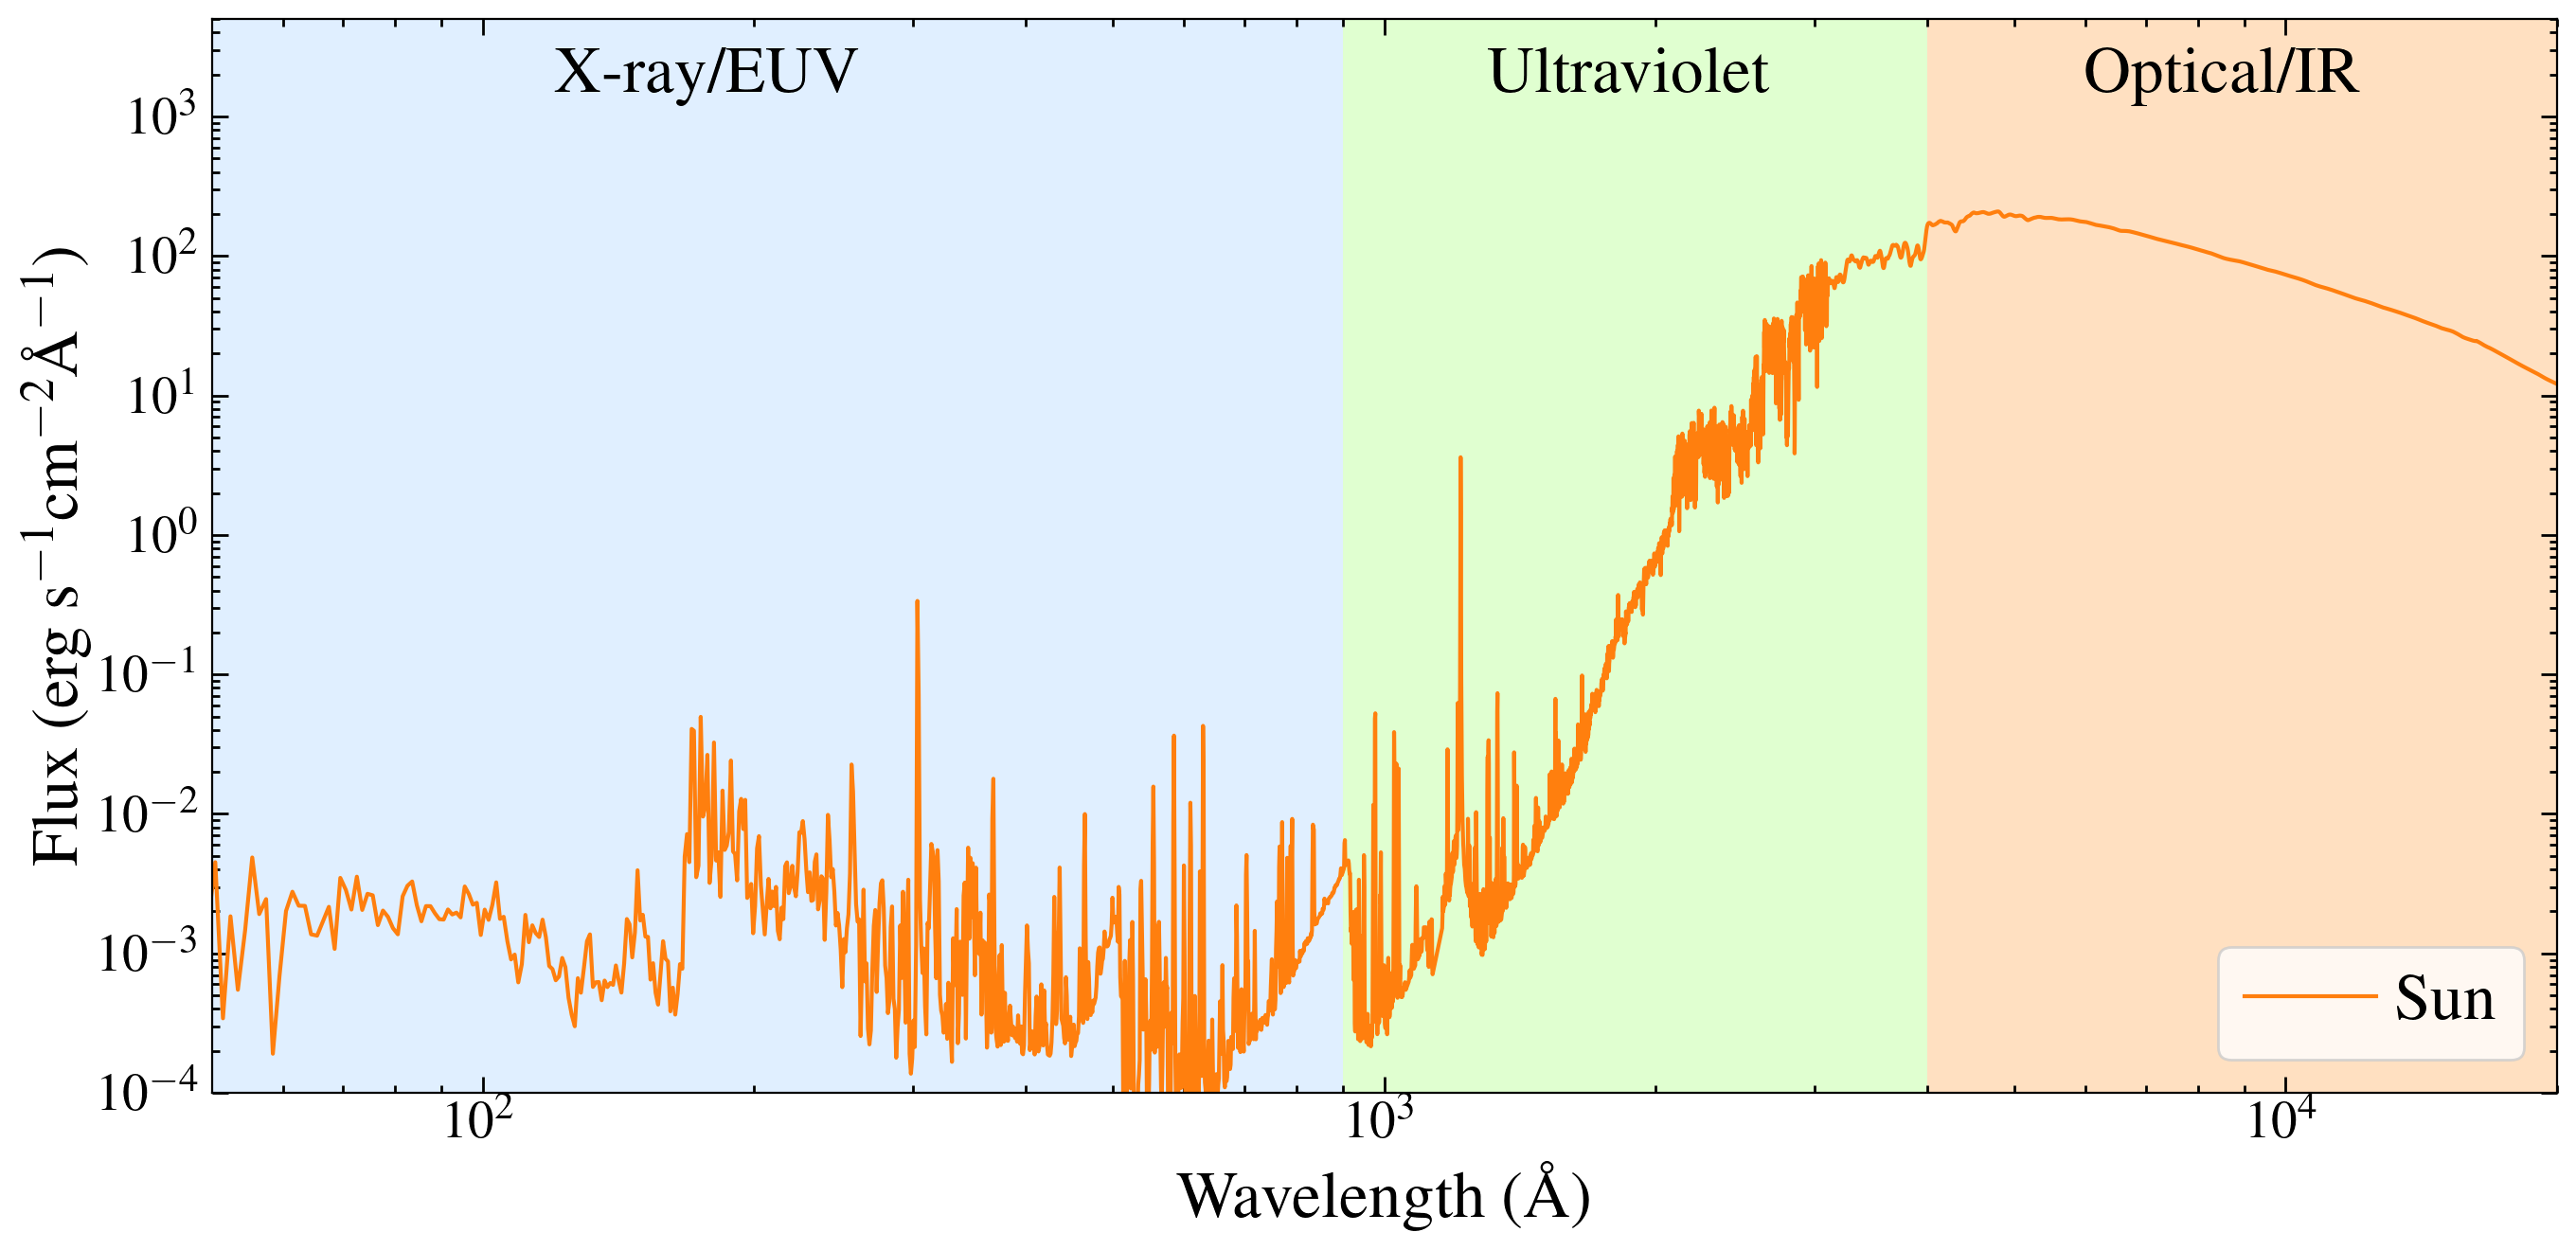

In [7]:
plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn*bb_scale, c='C3', label = 'GJ674 (M3)')
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))

plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.legend(fontsize=25, loc=4,frameon=True)
plt.tight_layout()
# plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_sun.png', dpi=150, facecolor='w')


In [8]:
# plt.figure(figsize=(14, 7))


# # plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn)#, c='C3', label = 'GJ674 (M3)')
# plt.xlim(5, 100000)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.1e-18, 9.9e-12)

# # plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
# # #plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# # plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# # # plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
# # #plt.annotate(' Photochemistry', (900, 1e-13))

# # plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
# # #plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
# # bar_y = 1e3
# # label_y = bar_y*1.5
# # e_y = bar_y *0.3
# # # plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('XMM', (10, label_y))

# # # plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('APEC', (75, label_y), ha='center')

# # # plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('EUV Model', (350, label_y), ha='center')

# # # plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('HST', (1900, label_y))

# # # plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('PHOENIX', (8000, label_y))
# # plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
# # plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
# # plt.annotate('Optical/IR' ,(6000, label_y), size=25)

# plt.xlabel('Wavelength (\AA)', size=25)
# plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# # plt.legend(fontsize=25, loc=4,frameon=True)
# plt.tight_layout()
# # plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_clean_png', dpi=150, facecolor='w')


In [9]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(4, 3,  sharex=True, sharey=True,figsize=(20,15))

# for j, spec in enumerate(specs):
    
# #     print(spec)
# #     plt.figure(figsize = (4*len(doublets), 10))
# #     gs = GridSpec(2, 4)
#     plt.subplot(4, 3, j+1)
#     data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
#     # boloflux = fits.getheader(spec)['BOLOFLUX']
# #     print(star)
# #     stars.append(star)
#     w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #     wn, fn, en = remove_negatives(w, f, e)
# #         plt.plot(w[w< 4000], f[w< 4000])    
#     plt.step(w, f/np.median(f), c='C{}'.format(j), where='mid')
#     # plt.step(w, f/boloflux, c='C{}'.format(j))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlim(10.1, 99999.9)
#     plt.ylim(1.1e-6, 1.7e1)
# #     mplcyberpunk.add_glow_effects()
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     plt.title(star)
# #     if j == 3:
# #         plt.ylabel('Normalised Flux', size=25)
# #     if j == 10:
# #         plt.xlabel('Wavelength (\AA)', size=25)

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Normalised Flux', size=25, labelpad=12)
# plt.xlabel('Wavelength (\AA)', size=25)
# plt.tight_layout()
# # plt.subplots_adjust(left=)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
# plt.savefig('plots/gallery.pdf', dpi=150, facecolor='w')
# # plt.savefig('plots/gallery_cp.png', dpi=150)
# #     plt.show()

Habitable zones

In [10]:
habz = np.loadtxt('HZs.dat')

In [11]:
starsdata = Table.read('../../../stars_table/EEM_dwarf_UBVIJHK_colors_Teff_fixed.csv', format='csv')
tstars, lstars = starsdata['Teff'], 10**starsdata['logL']
li = interpolate.interp1d(tstars, lstars)

In [12]:
mm_params = Table.read('../optical/stellar_parameters.csv')
mm_params.dtype.names

('Target',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'J_e',
 'Hmag',
 'H_e',
 'Kmag',
 'K_e',
 'Rmag',
 'R_e',
 'spt',
 'L_bol',
 'L_bol_e',
 'Mass',
 'Mass_e',
 'Radius',
 'Radius_e',
 'Teff',
 'Teff_e',
 'parallax',
 'distance',
 'P_rot_d')

In [13]:
planet_m = {'GJ 676A':[4.4, 11.5, 2127, 2161], 'GJ 15A':[ 5.35], 'GJ 649':[87.4], 'GJ 674':[11.1], 'GJ 163':[10.6, 6.8, 29.0],
           'GJ 1132':[1.66,2.64], 'GJ 849':[283, 342.9], 'Trappist-1':[1.017, 1.156, 0.297,0.772, 0.934,1.148, 0.331]} 

planet_a = {'GJ 676A':[0.04, 0.187, 1.8152,6.6], 'GJ 15A':[ 0.072], 'GJ 649':[1.13], 'GJ 674':[0.039], 'GJ 163':[0.061, 0.125, 1.03],
           'GJ 1132':[0.0153,0.0476], 'GJ 849':[2.409, 4.974], 'Trappist-1':[0.011, 0.015, 0.022,0.029, 0.039,0.047, 0.062]} 

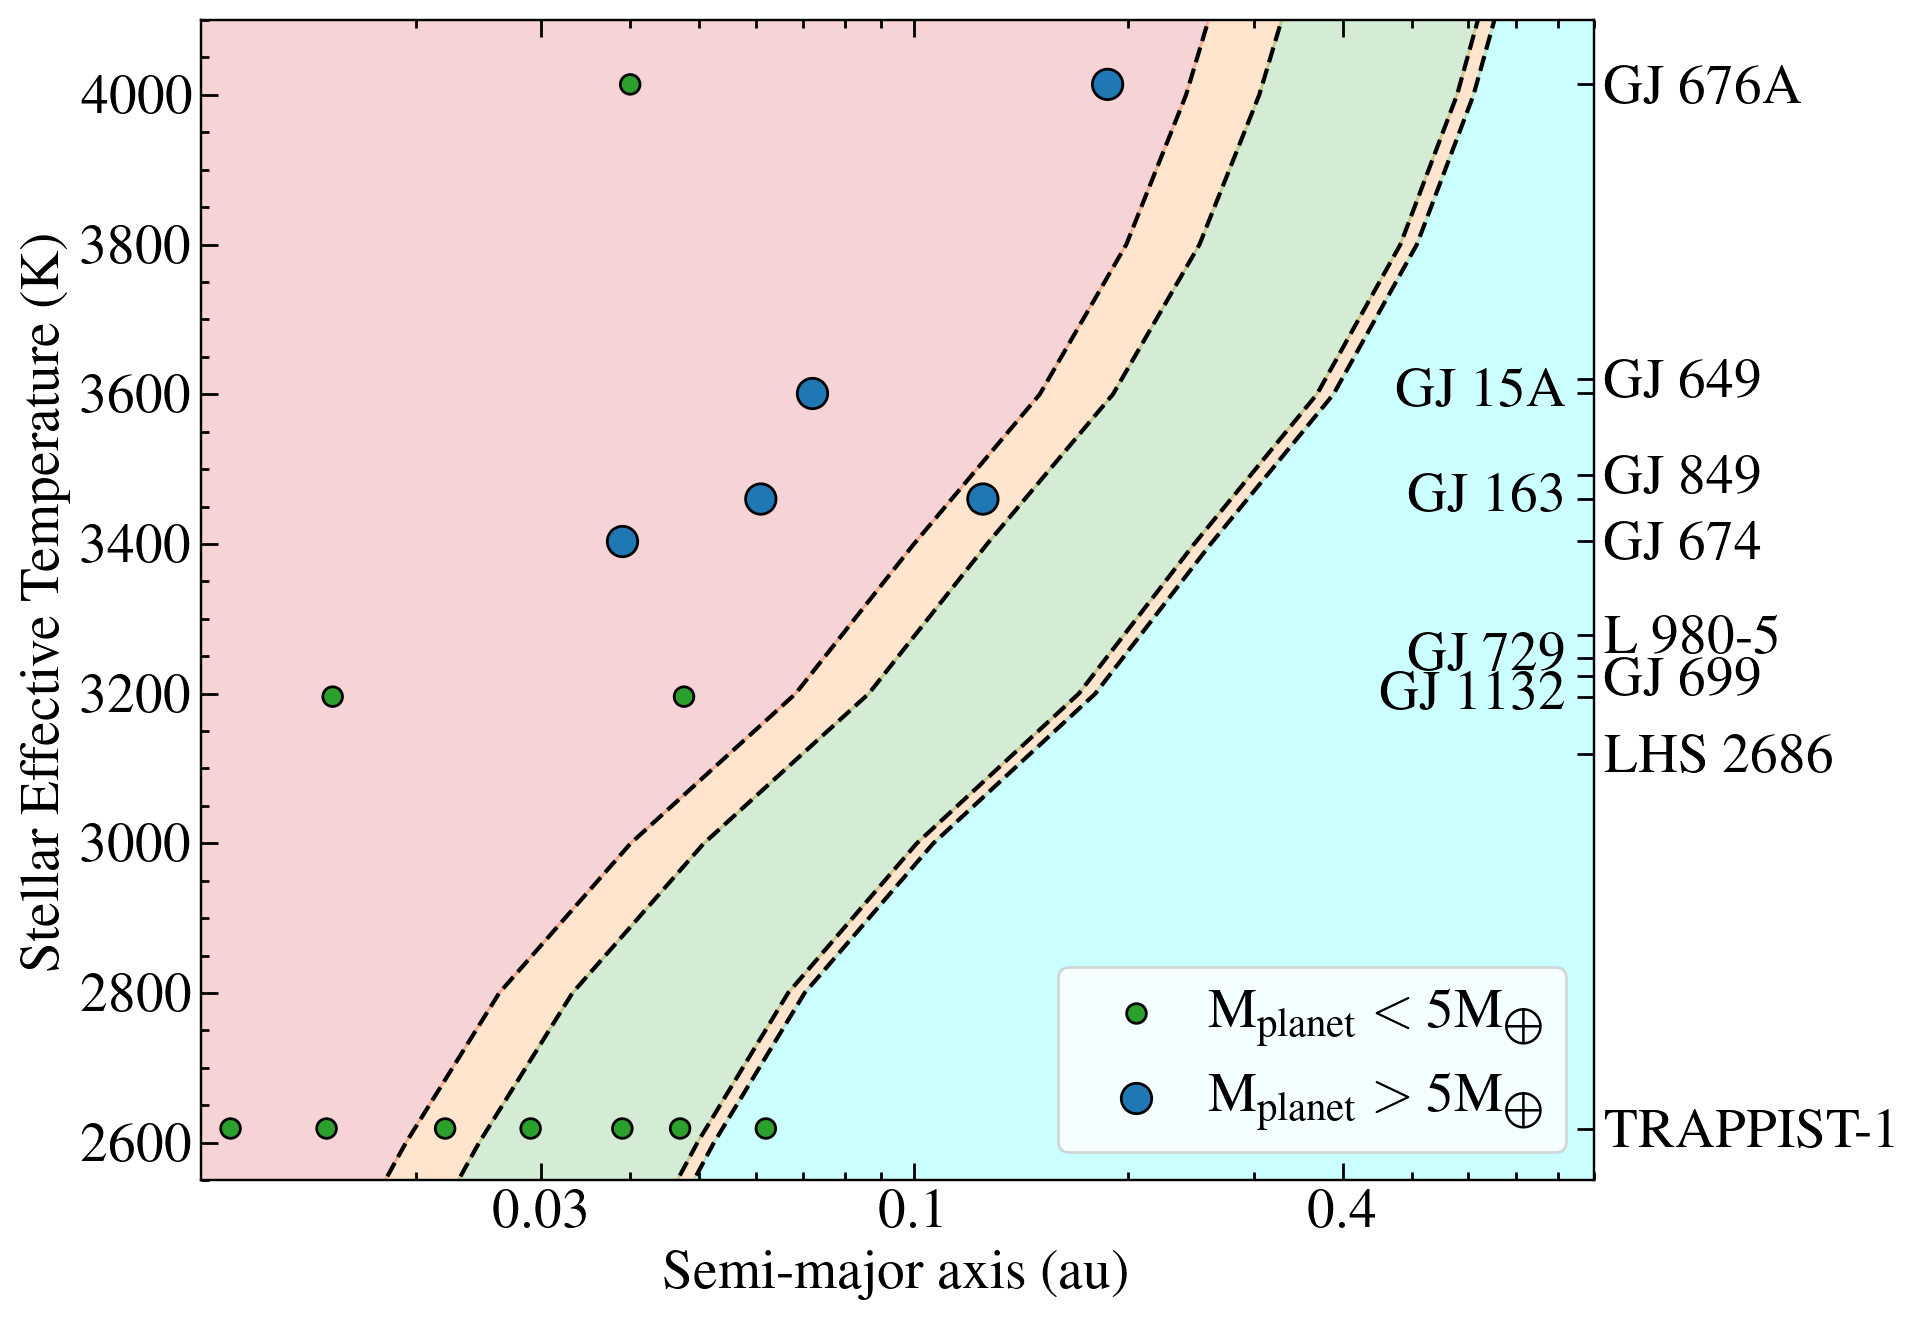

In [14]:
labels = ['Teff(K)', 'Recent Venus', 'Runaway Greenhouse', 'Maximum Greenhouse','Early Mars', '5ME Runaway  Greenhouse', '0.1ME Runaway Greenhouse']
                                              

fig, ax =plt.subplots(figsize=(10, 7), sharex=True, sharey=True)

tefflims = [2550, 4100]

columns = [1, 2, 3, 4]
cols = ['C3','C2', 'C2', 'C3']
fillcols=['C3','C1', 'C2', 'C1']
hteffs = habz[:,0]
hlums = li(hteffs)
alast = np.full(len(hteffs), 0)
for i, col in enumerate(columns):
    s = habz[:,col]
    a = (hlums/s)**0.5
    plt.plot(a,hteffs, label = labels[col], c='k', ls='--', alpha=1.)
    plt.fill_betweenx(hteffs, alast, a, color=fillcols[i], alpha=0.2)
    alast = a
plt.fill_betweenx(hteffs, alast, np.full(len(alast), 10), color='cyan', alpha=0.2)
    
    
    


t1 = [0.018942461658199808, 0.023992418349443854, 0.04864997693231791, 0.05131643030421871]
# [plt.axvline(line) for line in t1] 

plt.xlabel('Semi-major axis (au)')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim(tefflims[0], tefflims[1])
plt.xlim(0.01,0.9)
plt.xticks((0.03, 0.1, 0.4), (0.03, 0.1, 0.4))

#calculate the middle of the conservative HZ for a given teff.
hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)
for teff in mm_params['Teff']:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
#     plt.scatter(np.mean([hi, ho]), teff)

for star in mm_params['Target']:
    if star in planet_a:
        planets = planet_a[star]
        masses = planet_m[star]
        sizes  = [] #marker size scales with mass roughly
        cols = []
        for mass in masses: 
            if mass <=5:
                sizes.append(50)
                cols.append('C2')
            else:
                sizes.append(120)
                cols.append('C0')
        teff = mm_params['Teff'][mm_params['Target']==star]
        plt.scatter(planets, np.full(len(planets), teff), s=sizes, c=cols, edgecolor='k')


ax2 = ax.twinx()
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False)      # ticks along the bottom edge are off   

teff_ticks = [2619, 3119, 3196, 3223, 3248, 3278, 3404, 3460, 3492, 3601, 3621, 4014]
tick_names = ['TRAPPIST-1', 'LHS 2686','' , 'GJ 699', '','L 980-5' , 'GJ 674','', 'GJ 849','' , 'GJ 649', 'GJ 676A']
skip_names = ['GJ 1132','GJ 729','GJ 163','GJ 15A']
skip_teffs = [3196,3248,3460, 3601]


ax2.set_yticks(teff_ticks, minor=False)
ax2.set_yticklabels(tick_names)
ax2.set_ylim(tefflims[0], tefflims[1])
[plt.annotate(name, (0.98,teff), xycoords=('axes fraction', 'data'), ha='right', va='center') for name, teff in zip(skip_names, skip_teffs)]

plt.scatter(10000, 10000, c='C2', edgecolor='k', s=50, label = r'$\mathrm{M_{planet}} < 5\mathrm{M_{\bigoplus}}$')
plt.scatter(10000, 10000, c='C0', edgecolor='k', s=120, label = r'$\mathrm{M_{planet}} > 5\mathrm{M_{\bigoplus}}$')

plt.legend(loc=4, frameon=True)
plt.tight_layout()
# plt.savefig('plots/planets_hz.png', facecolor='w', dpi=150)
# plt.savefig('plots/planets_hz.pdf', facecolor='w', dpi=150)

In [15]:
print(max(mm_params['Teff']))
print(min(mm_params['Teff']))

4014
2619


In [16]:
args = np.argsort(mm_params['Teff'])
print(np.array(mm_params['Teff'][args]))
print(np.array(mm_params['Target'][args]))

[2619 3119 3196 3223 3248 3278 3404 3460 3492 3601 3621 4014]
['Trappist-1' 'LHS 2686' 'GJ 1132' 'GJ 699' 'GJ 729' 'L 980-5' 'GJ 674'
 'GJ 163' 'GJ 849' 'GJ 15A' 'GJ 649' 'GJ 676A']


In [17]:

# import mplcyberpunk
# plt.style.use("cyberpunk")

# # fig = plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(4, 3,  sharex=True, sharey=True,figsize=(20,15))

# for j, spec in enumerate(specs):
    
# #     print(spec)
# #     plt.figure(figsize = (4*len(doublets), 10))
# #     gs = GridSpec(2, 4)
#     plt.subplot(4, 3, j+1)
#     data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
#     # boloflux = fits.getheader(spec)['BOLOFLUX']
# #     print(star)
# #     stars.append(star)
#     w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #     wn, fn, en = remove_negatives(w, f, e)
# #         plt.plot(w[w< 4000], f[w< 4000])    
#     plt.step(w, f/np.median(f), c='C{}'.format(j), where='mid')
#     # plt.step(w, f/boloflux, c='C{}'.format(j))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlim(10.1, 99999.9)
#     plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     plt.title(star)
# #     if j == 3:
# #         plt.ylabel('Normalised Flux', size=25)
# #     if j == 10:
# #         plt.xlabel('Wavelength (\AA)', size=25)

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Normalised Flux', size=25, labelpad=12)
# plt.xlabel('Wavelength (\AA)', size=25)
# plt.tight_layout()
# # plt.subplots_adjust(left=)


# plt.savefig('plots/gallery_cp.png', dpi=150)
# plt.savefig('plots/gallery_cp.pdf', dpi=150)
# #     plt.show()

Emisson lines and cross sections, formation temperature

In [18]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/LHS-2686/'
sed = 'hlsp_muscles_multi_multi_lhs-2686_broadband_v10_var-res-sed.fits'

data = fits.getdata('{}{}'.format(path, sed), 1)

wav, fl = data['WAVELENGTH'], data['FLUX']


In [19]:
demlines = Table.read('../lines/plot_linelist.csv')
demlines.dtype.names

('Ion', 'Wavelength', 'Likelihood to measure', 'Log Formation Temperature')

In [20]:
csections = glob.glob('../../cross_sections/*.txt')
csections

['../../cross_sections/N2_cs.txt',
 '../../cross_sections/CO2_cs.txt',
 '../../cross_sections/H2_cs.txt',
 '../../cross_sections/O2_cs.txt',
 '../../cross_sections/O3_cs.txt',
 '../../cross_sections/H2O_cs.txt',
 '../../cross_sections/CH4_cs.txt',
 '../../cross_sections/N2O_cs.txt']

(0.0, 2.5e-17)

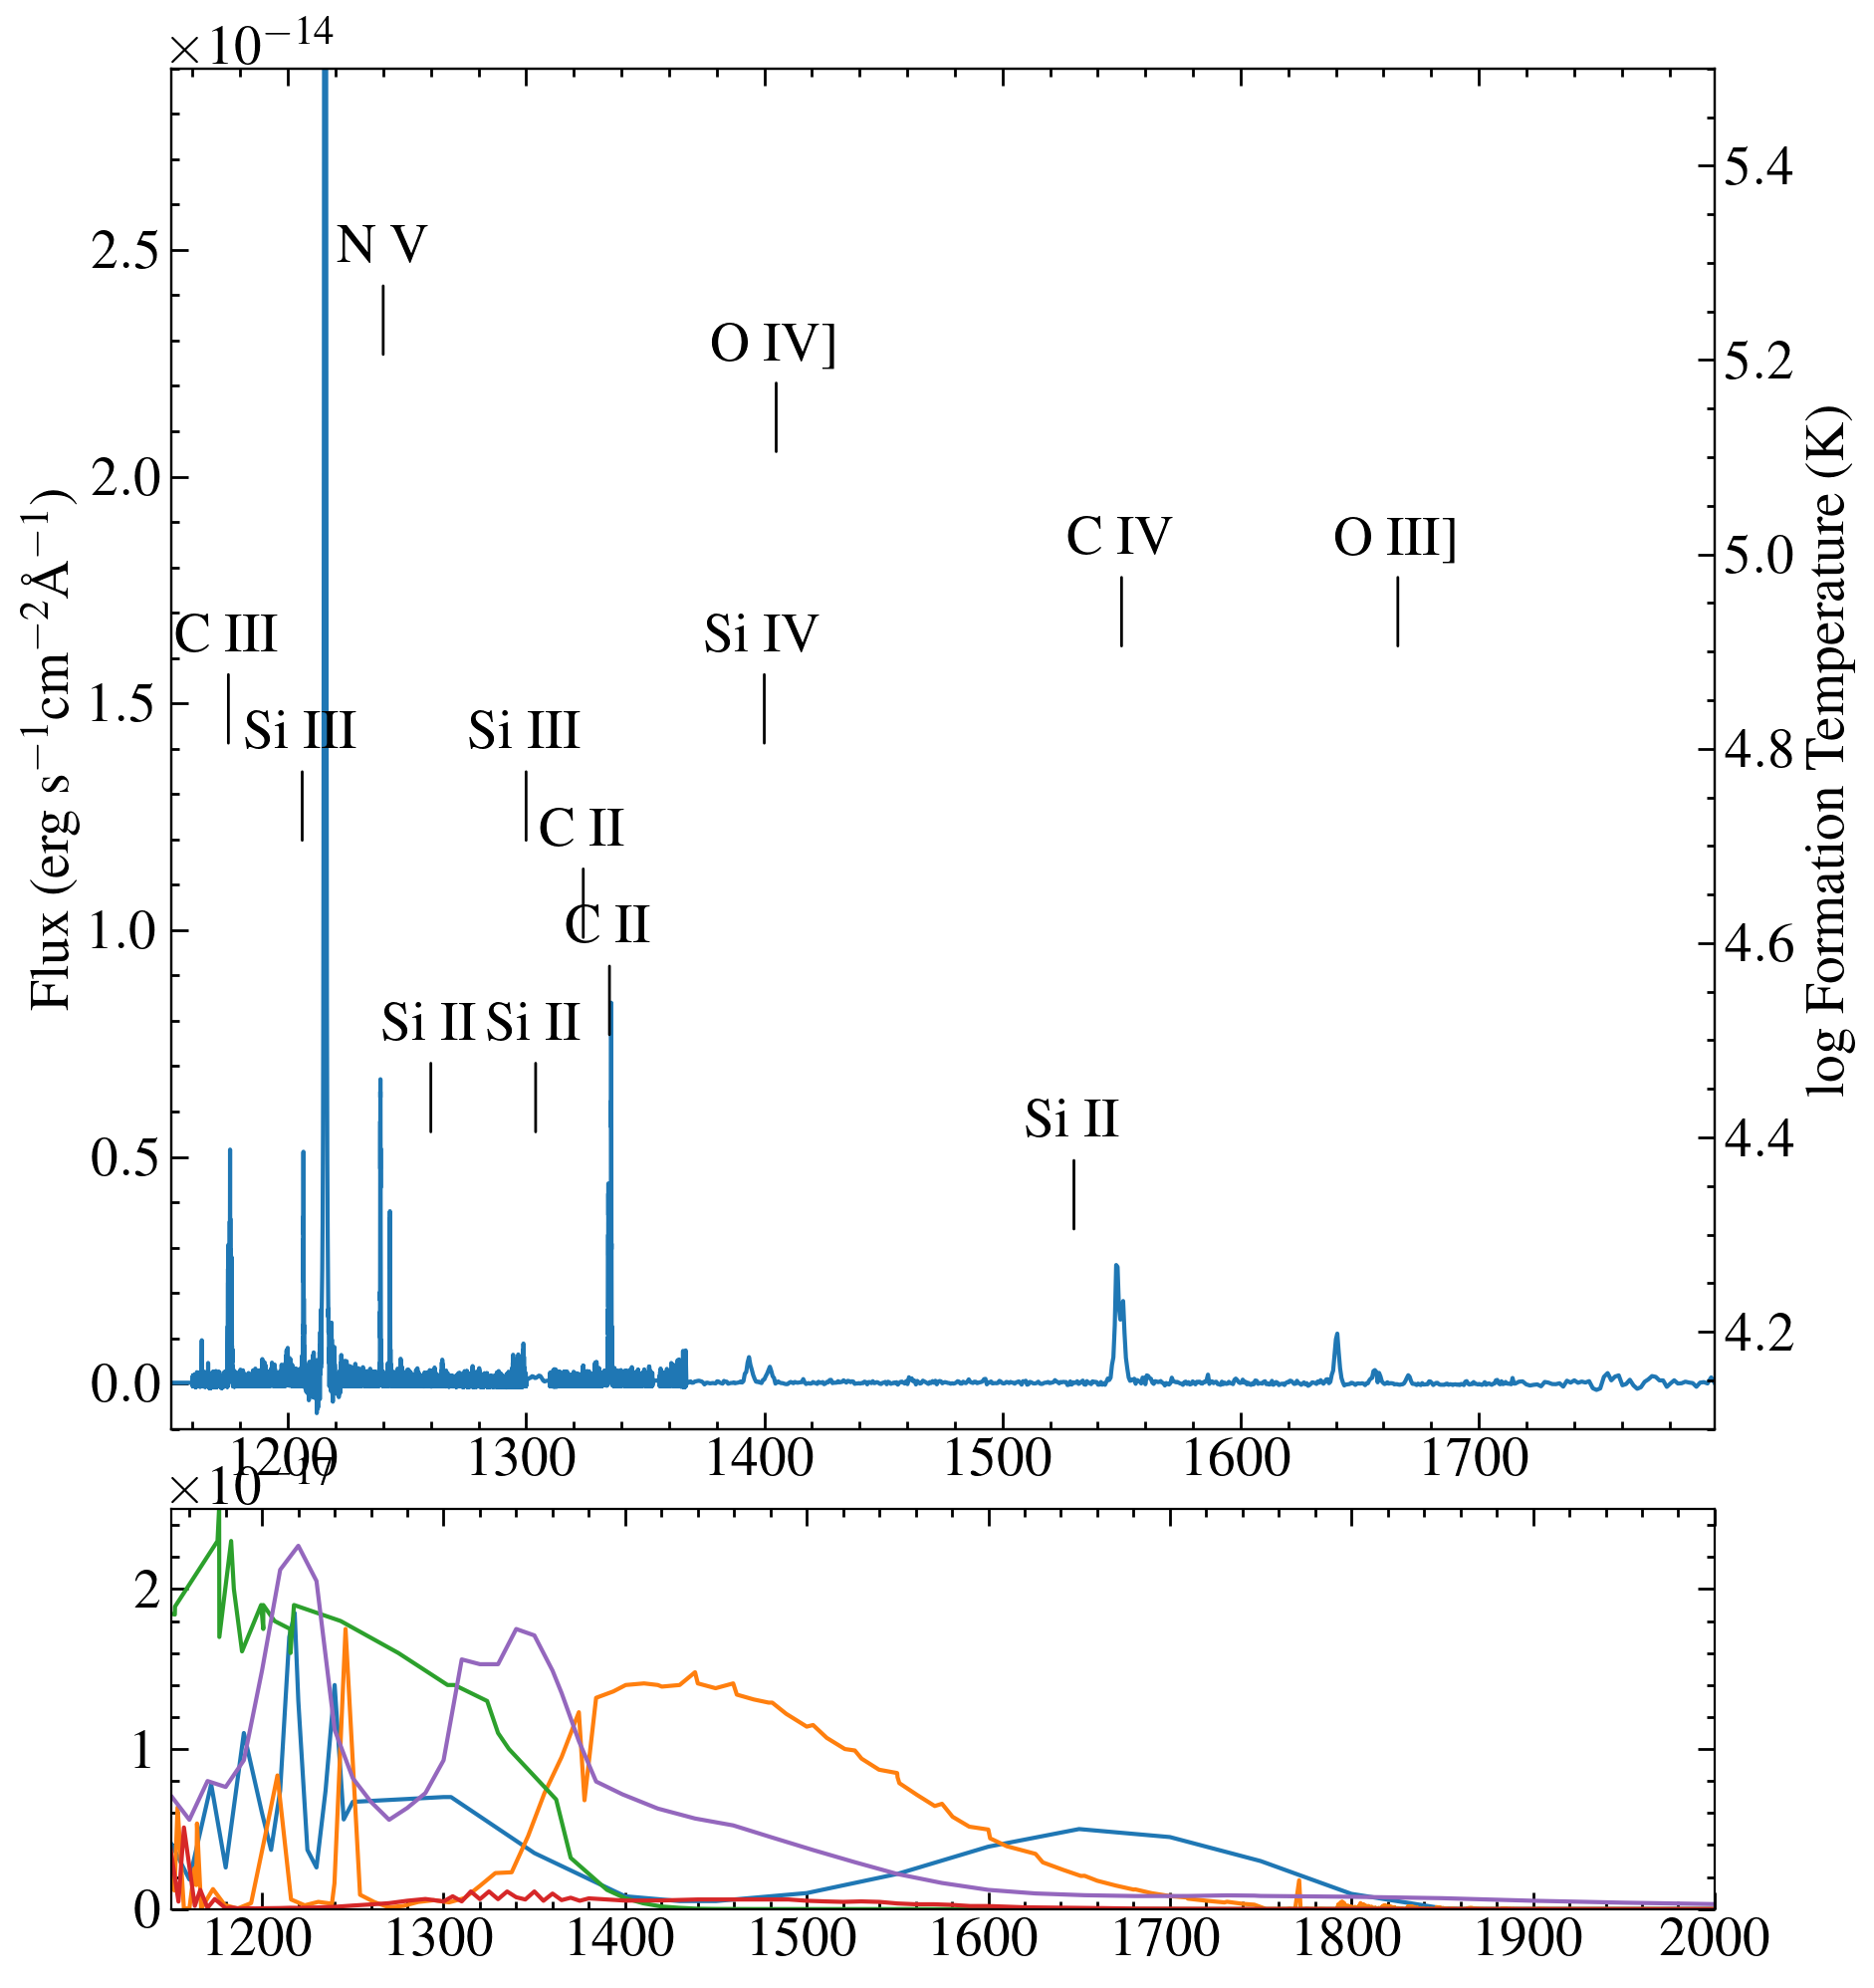

In [21]:
mask = (wav > 800) & (wav < 1000) | (wav > 1160) & (wav < 2900)
w, f = wav[mask], fl[mask]


mols = ['H2O', 'O2', 'CH4', 'CO2', 'O3']

# fig, ax = plt.subplots(figsize=(10, 12))
fig = plt.figure(figsize=(10, 12))
axes = fig.subplot_mosaic([['A'],['A'], ['A'], ['B']])

ax = axes['A']

ax.plot(w, f)

ax2 = ax.twinx()
# ax2.scatter(demlines['Wavelength'], demlines['Log Formation Temperature'])
for row in demlines:
    if row['Likelihood to measure'] in ['High', 'Medium'] and row['Wavelength'] > 1160 or row['Ion'] == 'Fe XXI':
        ax2.annotate(row['Ion'],(row['Wavelength'], row['Log Formation Temperature']-0.1), xytext=(row['Wavelength'], row['Log Formation Temperature']),arrowprops=dict(arrowstyle='-'), horizontalalignment='center') 
    # plt.annotate(name,(np.mean(si), 1.e-13), xytext=(np.mean(si), 1.05e-13), horizontalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
ax.set_xlim(1151, 1799)
ax.set_ylim(-1e-15, 2.9e-14)
ax2.set_ylim(4.1, 5.5)
ax2.set_ylabel('log Formation Temperature (K)')
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')


ax3 = axes['B']

for mol in mols:
    cs = Table.read('../../cross_sections/{}_cs.txt'.format(mol), format='ascii.basic')
    ax3.plot(cs['Lambda'], cs['Total'])

ax3.set_xlim(1150, 2000)
ax3.set_ylim(0, 0.25e-16)
# ax.set_xscale('log')
# ax3.set_yscale('log')

Gallery mk2

In [22]:
stars

['GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L-980-5',
 'LHS-2686',
 '2MASS-J23062928-0502285']

In [47]:
teffs = np.array([3196, 3601,3460,3621,3404,4014,3223,3248,3492,3278,3119,2619])
args = np.argsort(teffs)[::-1]
stars_sort = np.array(stars)[args]
specs_sort = np.array(specs)[args]
teffs_sort = teffs[args]
prots_sort = params['P_rot_d'][args]


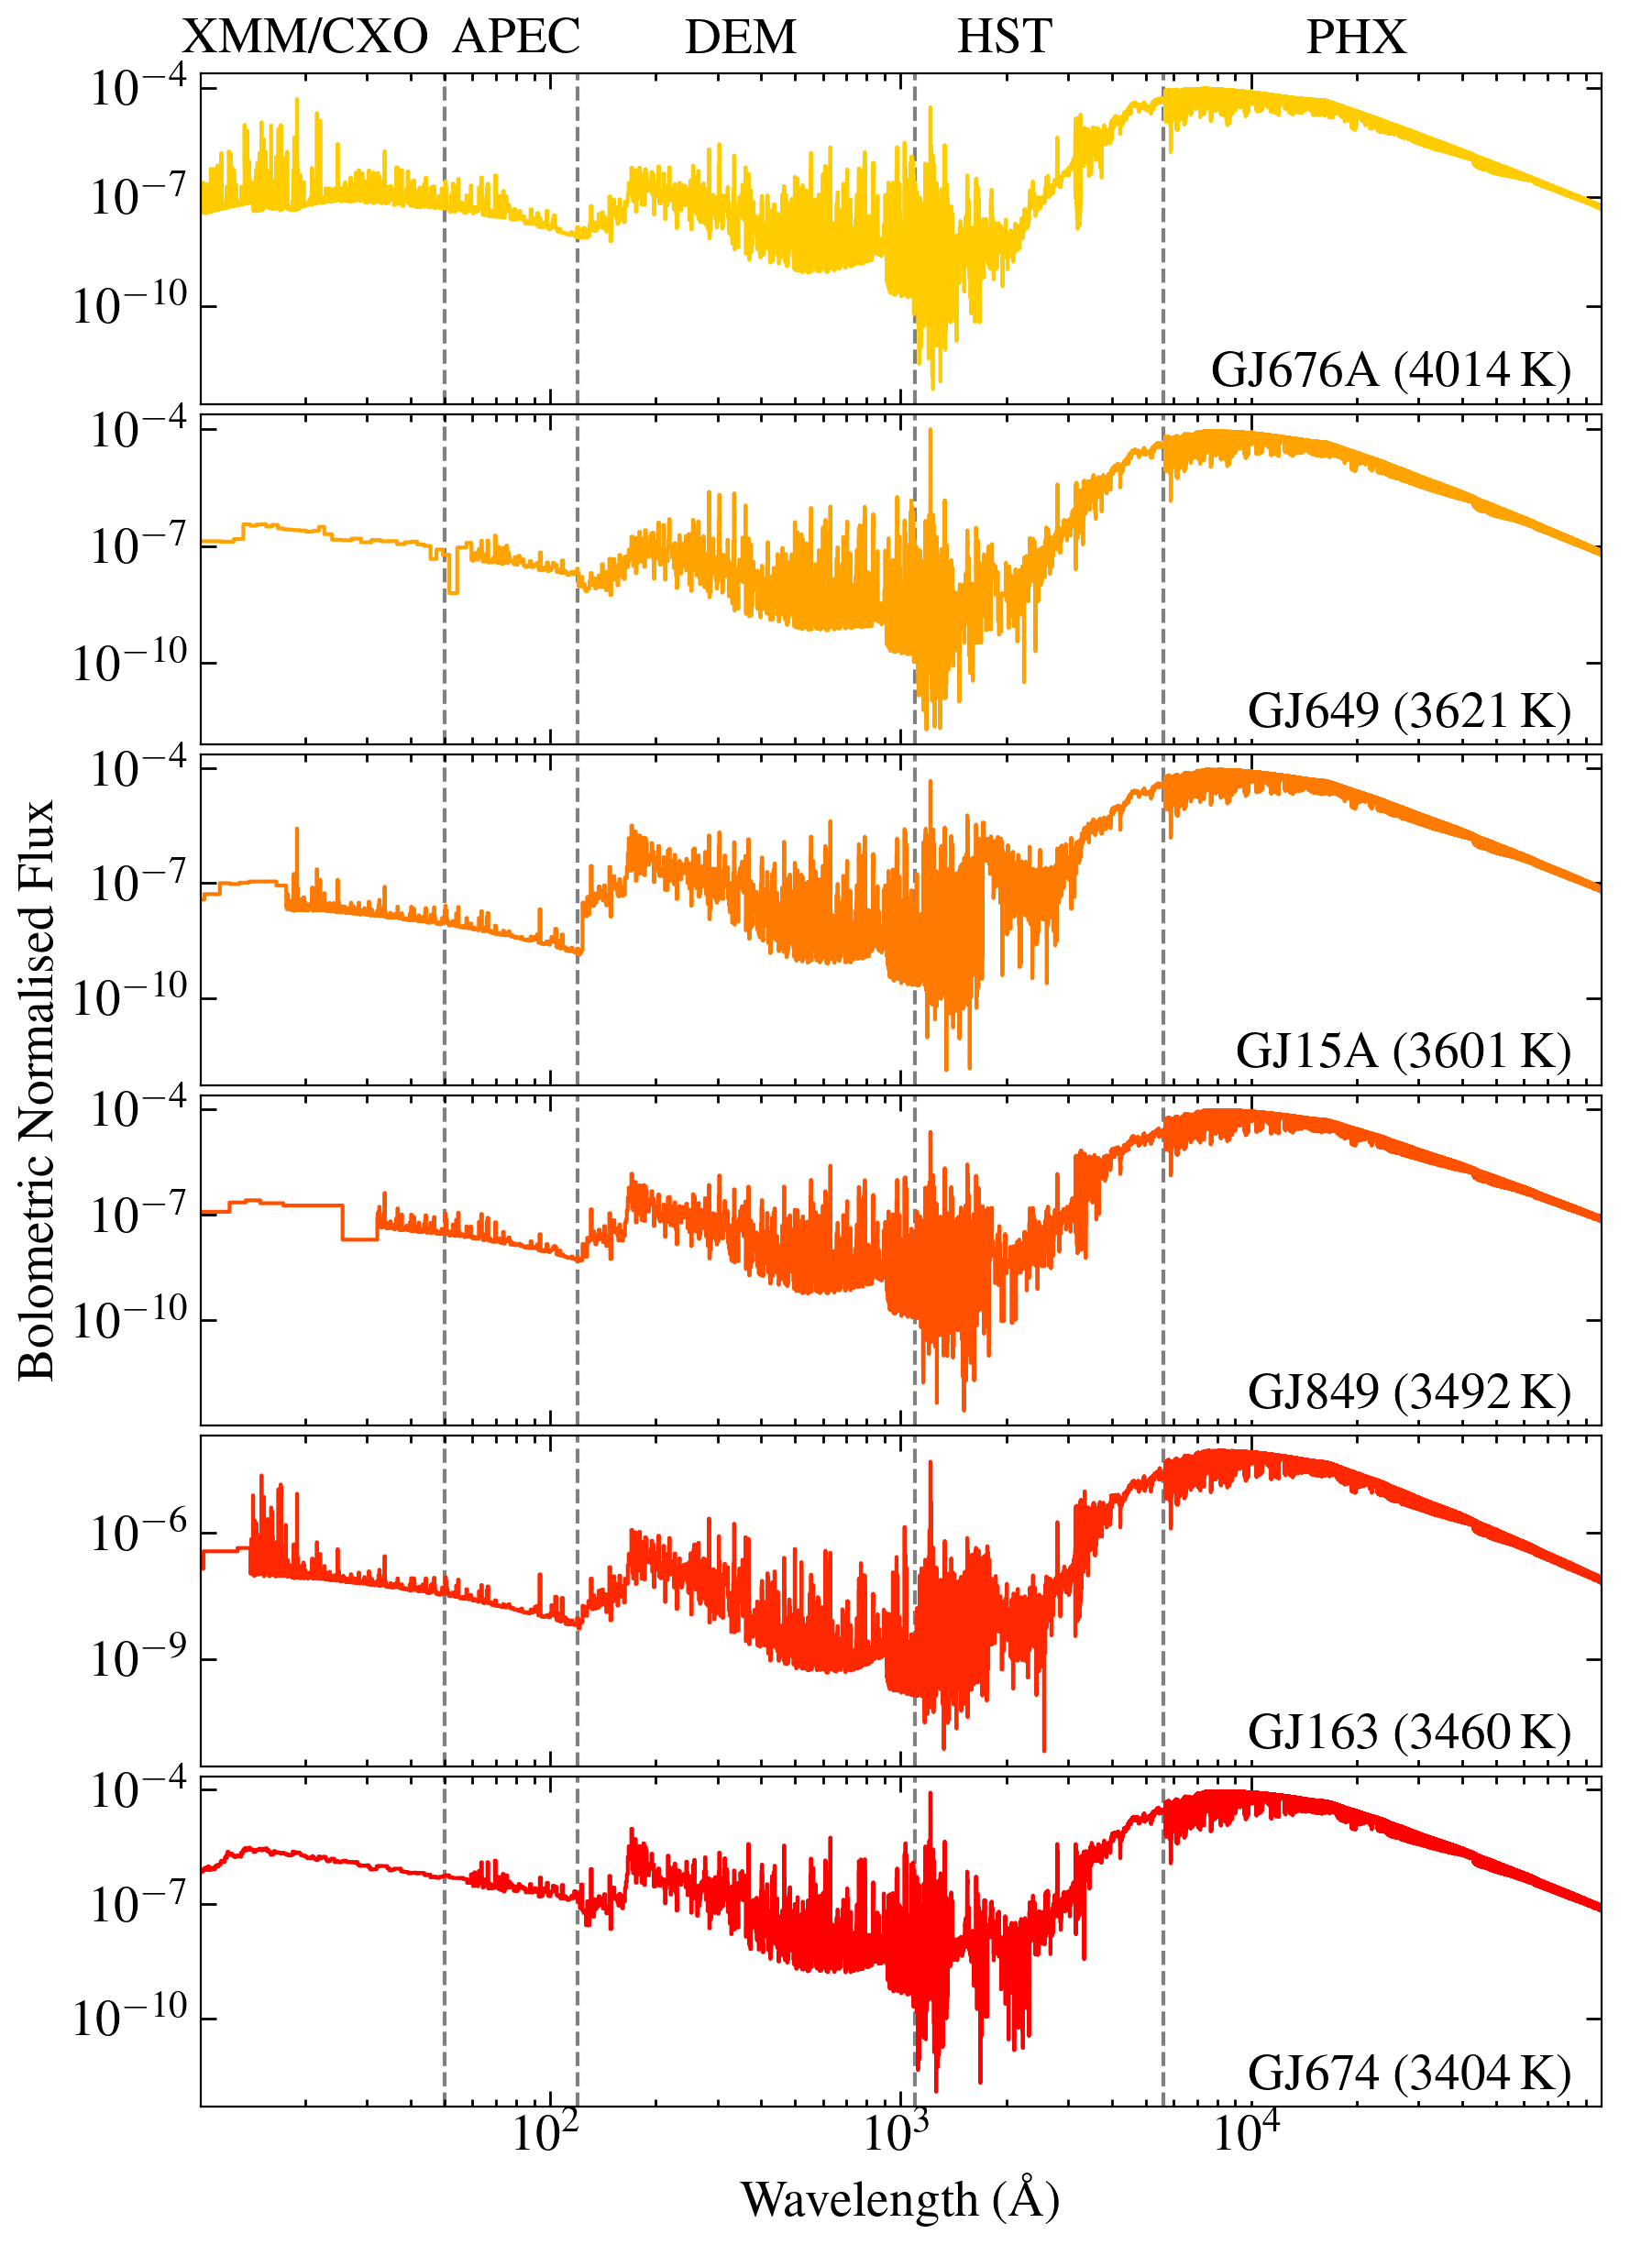

In [43]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(6, 1,  sharex=True, sharey=False,figsize=(10,13))

cols = np.linspace(0, 0.8, 6)[::-1]

for j, spec in enumerate(specs_sort[0:6]):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    ax = plt.subplot(6, 1, j+1)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # boloflux = fits.getheader(spec)['BOLOFLUX']
#     print(star)
#     stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    w, f = w[w< 1e6], f[w < 1e6]
#     wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
    ax.step(w, f, c=plt.cm.autumn(cols[j]), where='mid')
    # plt.step(w, f/boloflux, c='C{}'.format(j))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10.1, 99999.9)
    
    if j == 0:
        # ax.set_ylim(1e-11, 1)
        ylabel = 1.1
        plt.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        
        
    if j != 5:
        ax.set_xticks([])
        
    ax.axvline(50, ls ='--', c='0.5', zorder=-5)
    ax.axvline(120, ls ='--', c='0.5', zorder=-5)
    ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
    ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
    
    # plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    plt.annotate('{} ({}\,K)'.format(star, teffs_sort[j]), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
    # plt.title(star)
#     if j == 3:
#         plt.ylabel('Normalised Flux', size=25)
#     if j == 10:
#         plt.xlabel('Wavelength (\AA)', size=25)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
plt.xlabel('Wavelength (\AA)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
plt.savefig('plots/all_seds_1-6.pdf')
# plt.savefig('plots/gallery_cp.png', dpi=150)
#     plt.show()

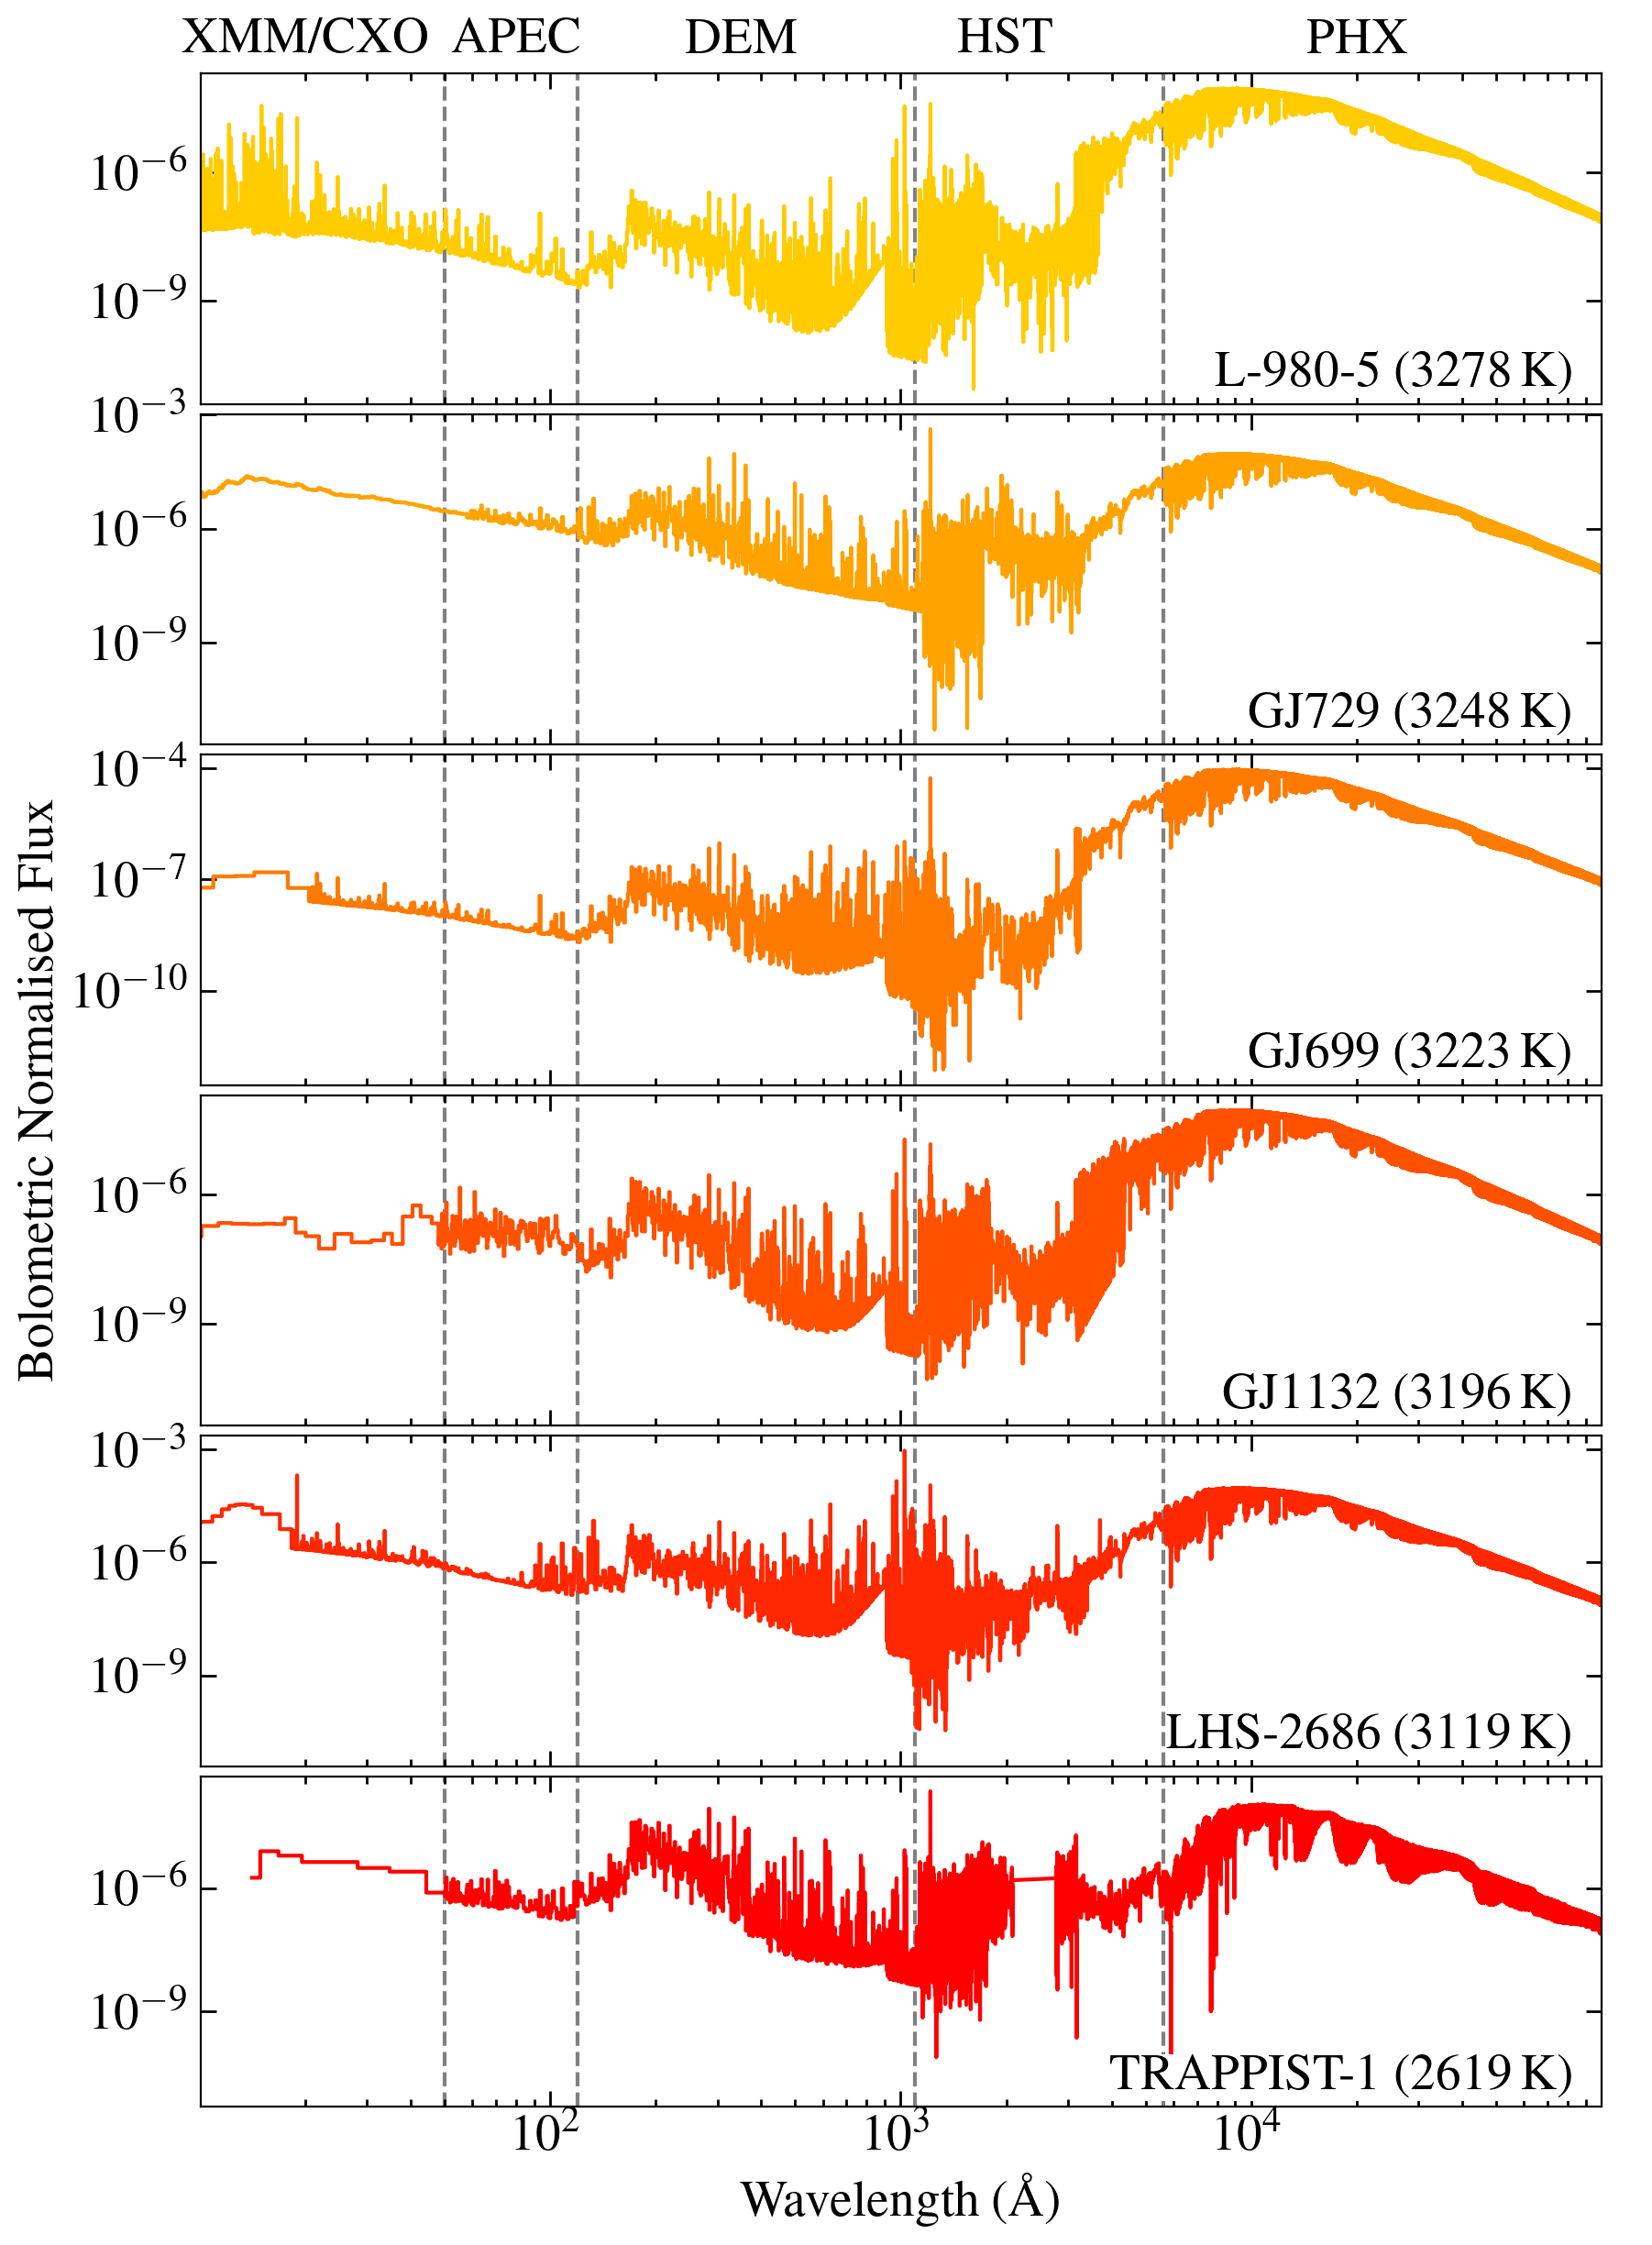

In [44]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(6, 1,  sharex=True, sharey=False,figsize=(10,13))

cols = np.linspace(0, 0.8, 6)[::-1]

for j, spec in enumerate(specs_sort[6:]):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    ax = plt.subplot(6, 1, j+1)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # boloflux = fits.getheader(spec)['BOLOFLUX']
#     print(star)
#     stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    w, f = w[w< 1e6], f[w < 1e6]
#     wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
    ax.step(w, f, c=plt.cm.autumn(cols[j]), where='mid')
    # plt.step(w, f/boloflux, c='C{}'.format(j))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10.1, 99999.9)
    
    if j == 0:
        # ax.set_ylim(1e-11, 1)
        ylabel = 1.1
        plt.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        
        
    if j != 5:
        ax.set_xticks([])
        
    ax.axvline(50, ls ='--', c='0.5', zorder=-5)
    ax.axvline(120, ls ='--', c='0.5', zorder=-5)
    ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
    ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
    
    # plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    plt.annotate('{} ({}\,K)'.format(star, teffs_sort[j+6]), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
    # plt.title(star)
#     if j == 3:
#         plt.ylabel('Normalised Flux', size=25)
#     if j == 10:
#         plt.xlabel('Wavelength (\AA)', size=25)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
plt.xlabel('Wavelength (\AA)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
plt.savefig('plots/all_seds_7-12.pdf')
# plt.savefig('plots/gallery_cp.png', dpi=150)
#     plt.show()

In [26]:
specs_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hdd

In [27]:
planet_a

{'GJ 676A': [0.04, 0.187, 1.8152, 6.6],
 'GJ 15A': [0.072],
 'GJ 649': [1.13],
 'GJ 674': [0.039],
 'GJ 163': [0.061, 0.125, 1.03],
 'GJ 1132': [0.0153, 0.0476],
 'GJ 849': [2.409, 4.974],
 'Trappist-1': [0.011, 0.015, 0.022, 0.029, 0.039, 0.047, 0.062]}

In [28]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/'

specs2 = glob.glob('{}*/*_var-res*.fits'.format(path))
specs2


['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ1132/hlsp_muscles_multi_multi_gj1132_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ699/hlsp_muscles_multi_multi_gj699_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_multi_multi_gj729_broadband_v24_var-res-sed.fit

In [29]:
specs2_sort = np.array(specs2)[args]
specs2_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscl

In [30]:
euvs = []
fuvs = []
nuvs = []

for spec in specs2_sort:
    data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    euvmask = (w <= 1000)
    fuvmask = (w > 1000) & (w <=2000)
    nuvmask = (w > 2000) & (w <=3000)
    euvs.append(np.trapz(f[euvmask], w[euvmask]))
    fuvs.append(np.trapz(f[fuvmask], w[fuvmask]))
    nuvs.append(np.trapz(f[nuvmask], w[nuvmask]))
    
    
#     print(star)
    
    

In [31]:
params = Table.read('../optical/stellar_parameters.csv')
d_stars = []
for star in stars_sort:
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    if star == 'LHS-2686':
        star = 'LHS2686'
    if star == 'L-980-5':
        star = 'L980-5'
    for row in params:
        if row['Target'].replace(' ','').upper() == star:
            d_stars.append(row['distance'])
print(len(d_stars))
print(d_stars)

12
[15.85539876, 10.3755966, 3.562014676, 8.830022075, 15.01726986, 4.540501271, 13.39405304, 2.969826562, 1.823785815, 12.03804021, 13.14060447, 12.10946961]


In [32]:
params

Target,RAJ2000,DEJ2000,Jmag,J_e,Hmag,H_e,Kmag,K_e,Rmag,R_e,spt,L_bol,L_bol_e,Mass,Mass_e,Radius,Radius_e,Teff,Teff_e,parallax,distance,P_rot_d
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
GJ 1132,153.716027,-47.156796,9.245,0.026,8.666,0.031,8.322,0.027,13.098,0.11,M3.5,1.67e+31,5e+29,0.194,0.005,0.215,0.009,3196,72,83.07,12.03804021,126.59
GJ 676A,262.546646,-51.637012,6.711,0.02,6.082,0.024,5.825,0.029,8.675,0.012,M0,3.404e+32,8.3e+30,0.631,0.017,0.62,0.03,4014,94,63.07,15.85539876,41.2
GJ 15A,4.594036,44.022842,5.252,0.264,4.476,0.2,4.018,0.02,7.9,0.012,M1,8.61e+31,7e+29,0.393,0.009,0.385,0.002,3601,12,280.74,3.562014676,-1.0
GJ 649,254.536873,25.74423,6.448,0.021,5.865,0.02,5.624,0.016,8.685,0.012,M1,1.674e+32,1.7e+30,0.524,0.012,0.531,0.012,3621,41,96.38,10.3755966,-1.0
GJ 163,62.315307,-53.373737,7.948,0.026,7.428,0.04,7.135,0.021,10.734,0.012,M3.5,8.28e+31,2.4e+30,0.405,0.01,0.409,0.017,3460,76,66.59,15.01726986,61.0
GJ 849,332.417906,-4.640765,6.51,0.024,5.899,0.044,5.594,0.017,9.279,0.012,M3.5,1.105e+32,1e+30,0.465,0.011,0.464,0.018,3492,70,113.25,8.830022075,39.2
GJ 674,262.166316,-46.89513,5.711,0.019,5.154,0.033,4.855,0.018,8.337,0.012,M2.5,6.03e+31,1.4e+30,0.353,0.008,0.361,0.012,3404,59,220.24,4.540501271,32.9
GJ 699,269.452044,4.694597,5.244,0.02,4.834,0.034,4.524,0.02,8.298,0.012,M4,1.3e+31,2e+29,0.161,0.004,0.187,0.001,3223,17,548.31,1.823785815,130.4
L 980-5,215.313034,-1.122204,8.948,0.03,8.391,0.031,8.093,0.026,13.02,0.15,M3.5,2.49e+31,8e+29,0.232,0.006,0.25,0.01,3278,74,74.66,13.39405304,92.23


In [33]:
stars_sort

array(['GJ676A', 'GJ649', 'GJ15A', 'GJ849', 'GJ163', 'GJ674', 'L-980-5',
       'GJ729', 'GJ699', 'GJ1132', 'LHS-2686', '2MASS-J23062928-0502285'],
      dtype='<U23')

In [34]:
sol_spec =  readsav('../../stuff/Solar-data.idlsav')
w_sol, f_sol = sol_spec['wave']*10, sol_spec['flux']*100
# w_sol, f_sol = w_sol[w_sol >= mw[0]], f_sol[w_sol >= mw[0]]
# d_t1 = 12.1*u.pc 
d_sun = 1*u.au.to(u.pc)
euv_earth = np.trapz(f_sol[w_sol <= 1000], w_sol[w_sol <= 1000])
fuv_earth = np.trapz(f_sol[(w_sol > 1000) & (w_sol <= 2000)], w_sol[(w_sol > 1000) & (w_sol <= 2000)])
nuv_earth = np.trapz(f_sol[(w_sol > 2000) & (w_sol <= 3000)], w_sol[(w_sol > 2000) & (w_sol <= 3000)])


GJ676A
GJ649
GJ15A
GJ849
GJ163
GJ674
GJ1132
TRAPPIST-1


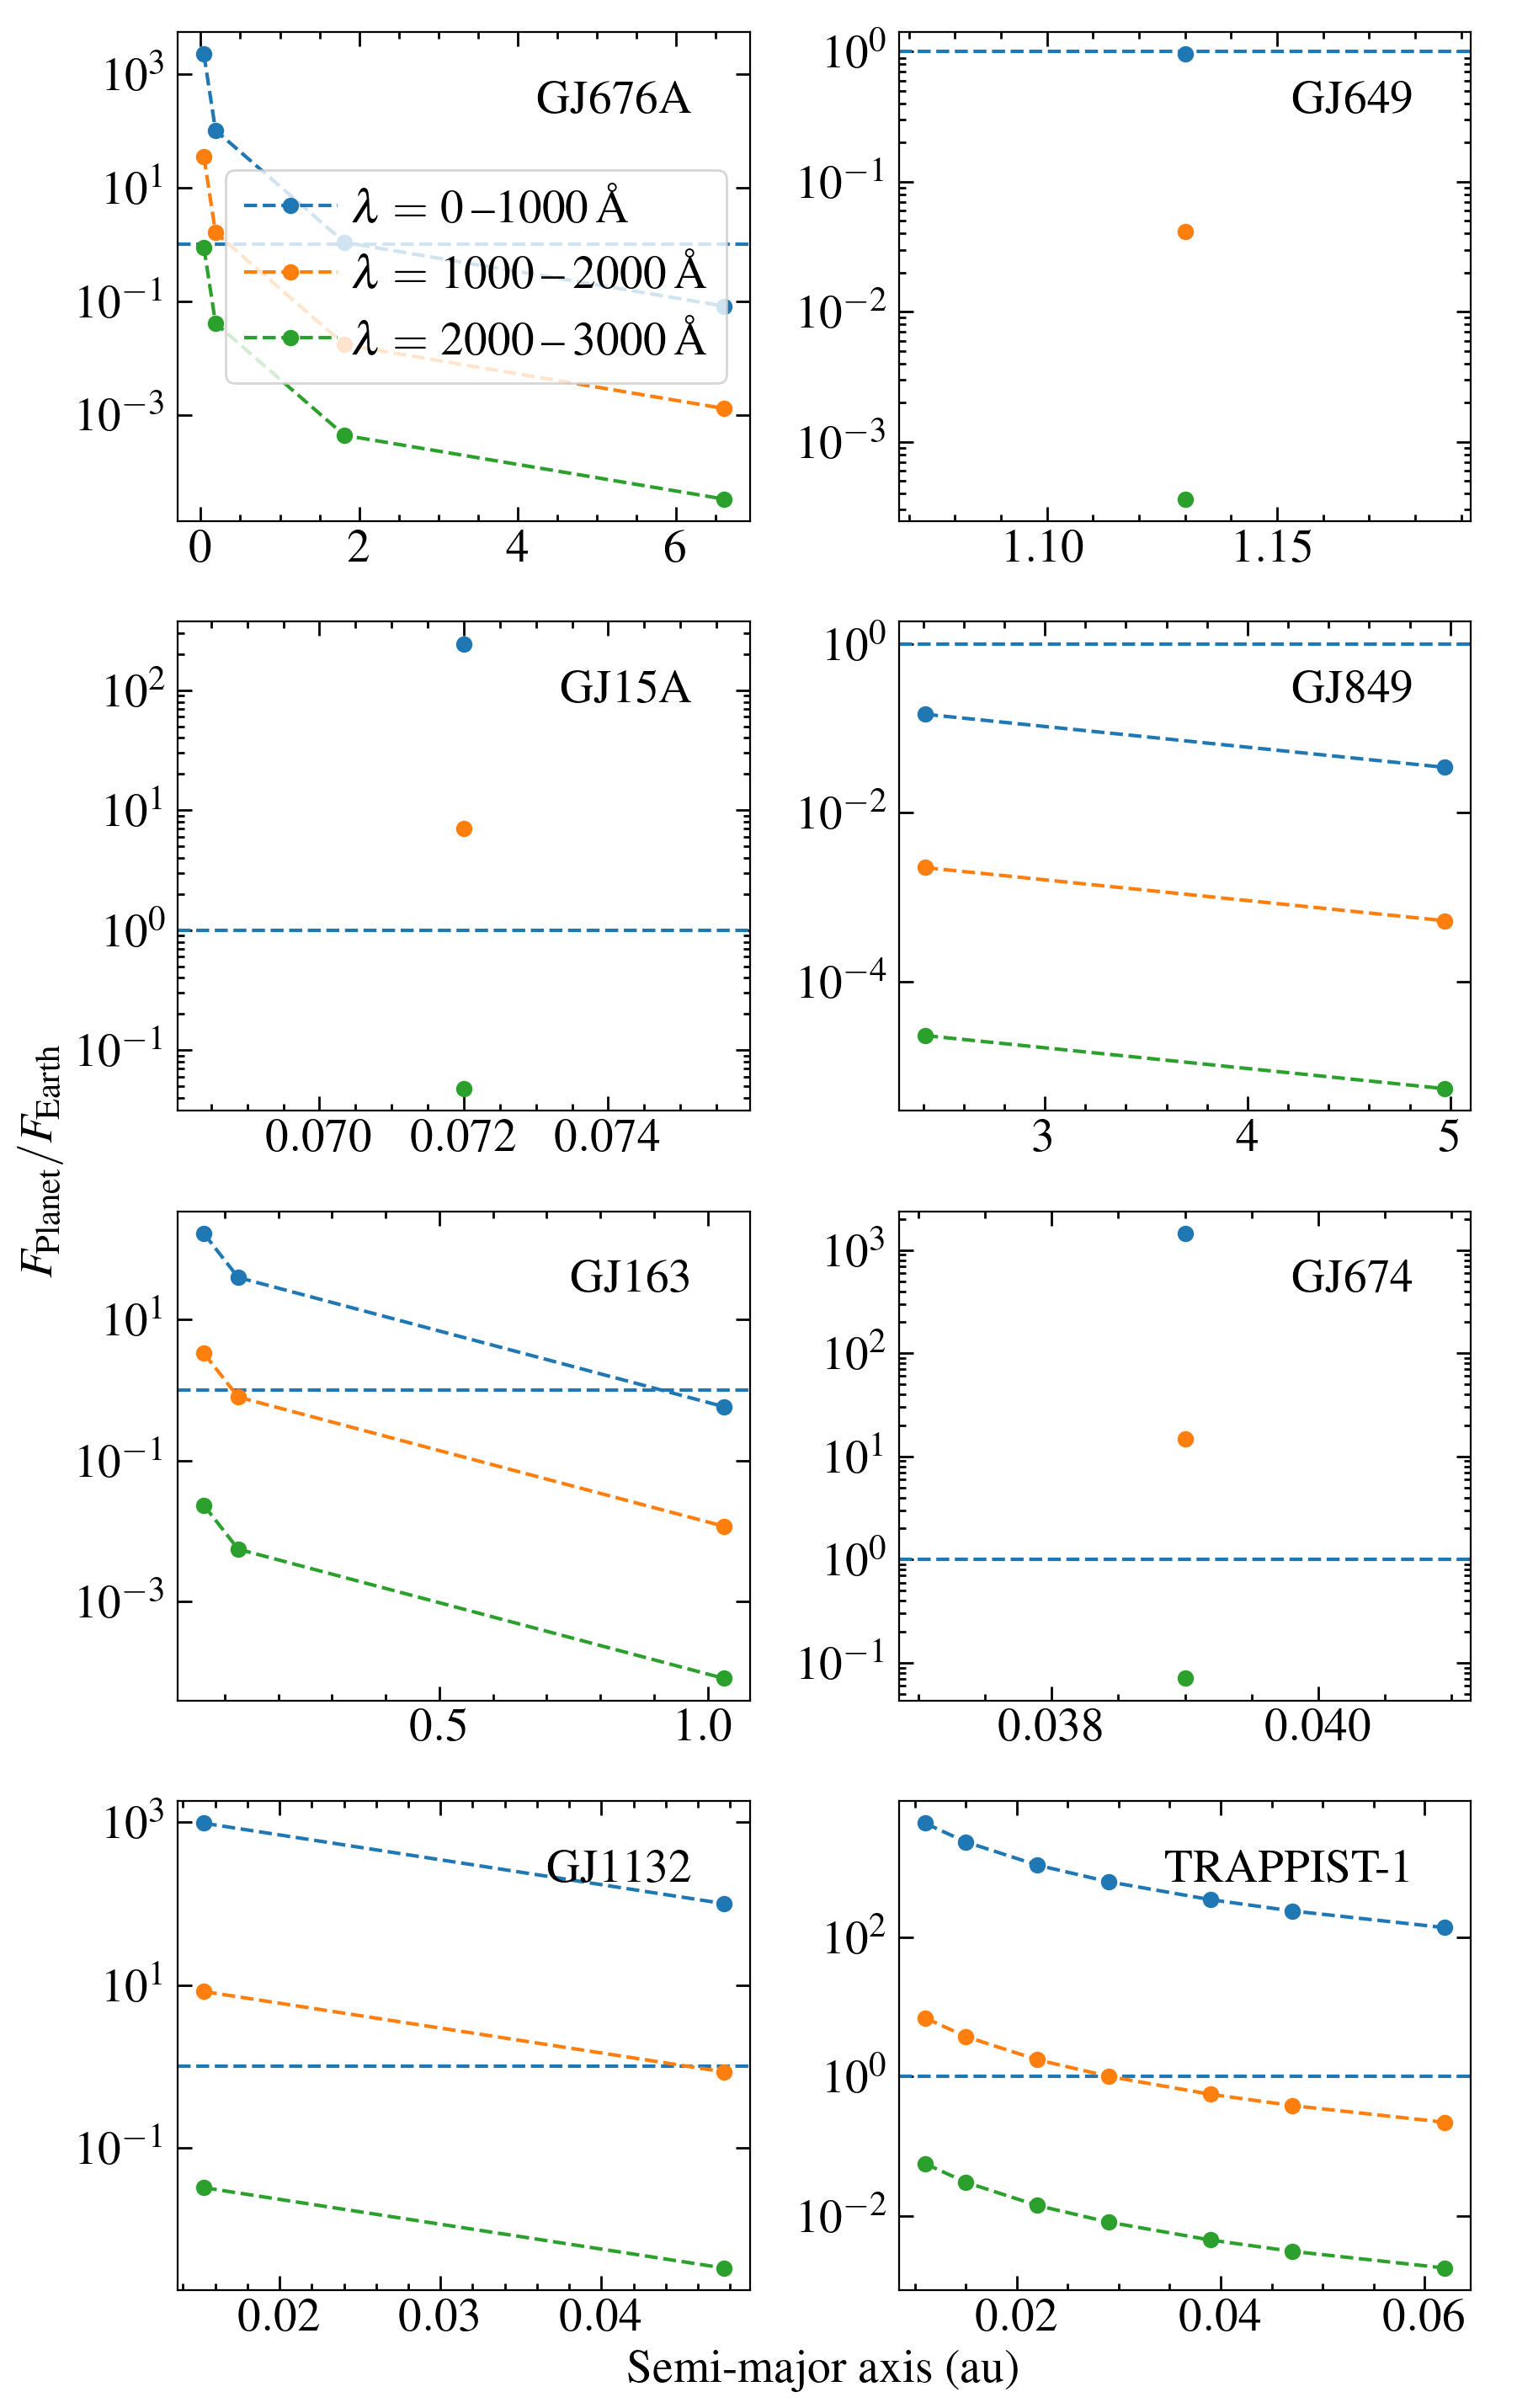

In [35]:


j = 0

fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize=(10, 15))

for i, star in enumerate(stars_sort):
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    for name in planet_a:
        if name.replace(' ','').upper() == star:
            print(star)
            ax = axes.flat[j]
            ax.annotate(star, (0.9, 0.9), ha='right', va='top', xycoords='axes fraction')
            euv_ratio = []
            fuv_ratio = []
            nuv_ratio = []
            for planet in planet_a[name]:
                scale = (((d_stars[i]*u.pc).to(u.au))/planet*u.au)**2
                euv_ratio.append(euvs[i]*scale.value/euv_earth)
                fuv_ratio.append(fuvs[i]*scale.value/fuv_earth)
                nuv_ratio.append(nuvs[i]*scale.value/nuv_earth)
            ax.errorbar(planet_a[name], euv_ratio, marker='o', label = r'$\lambda = $ 0\,--1000\,\AA', ls='--')
            ax.errorbar(planet_a[name], fuv_ratio, marker='o', label = r'$\lambda = $ 1000\,--\,2000\,\AA', ls='--')
            ax.errorbar(planet_a[name], nuv_ratio, marker='o', label = r'$\lambda = $ 2000\,--\,3000\,\AA', ls='--')
            if max(euv_ratio) / min(nuv_ratio) > 10:
                ax.set_yscale('log')
                
            ax.axhline(1, ls='--')
            
            if j == 0:
                ax.legend(loc=5, frameon=True)
            
            j +=1
    

bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# ax3.yaxis.set_label_position("right")
bigax.set_xlabel('Semi-major axis (au)')    
bigax.set_ylabel('$F_{\mathrm{Planet}}/F_{\mathrm{Earth}}$', labelpad =20)
fig.tight_layout()

Ok so the way to do it is to plot F/Fe in their habiatble zones against teff

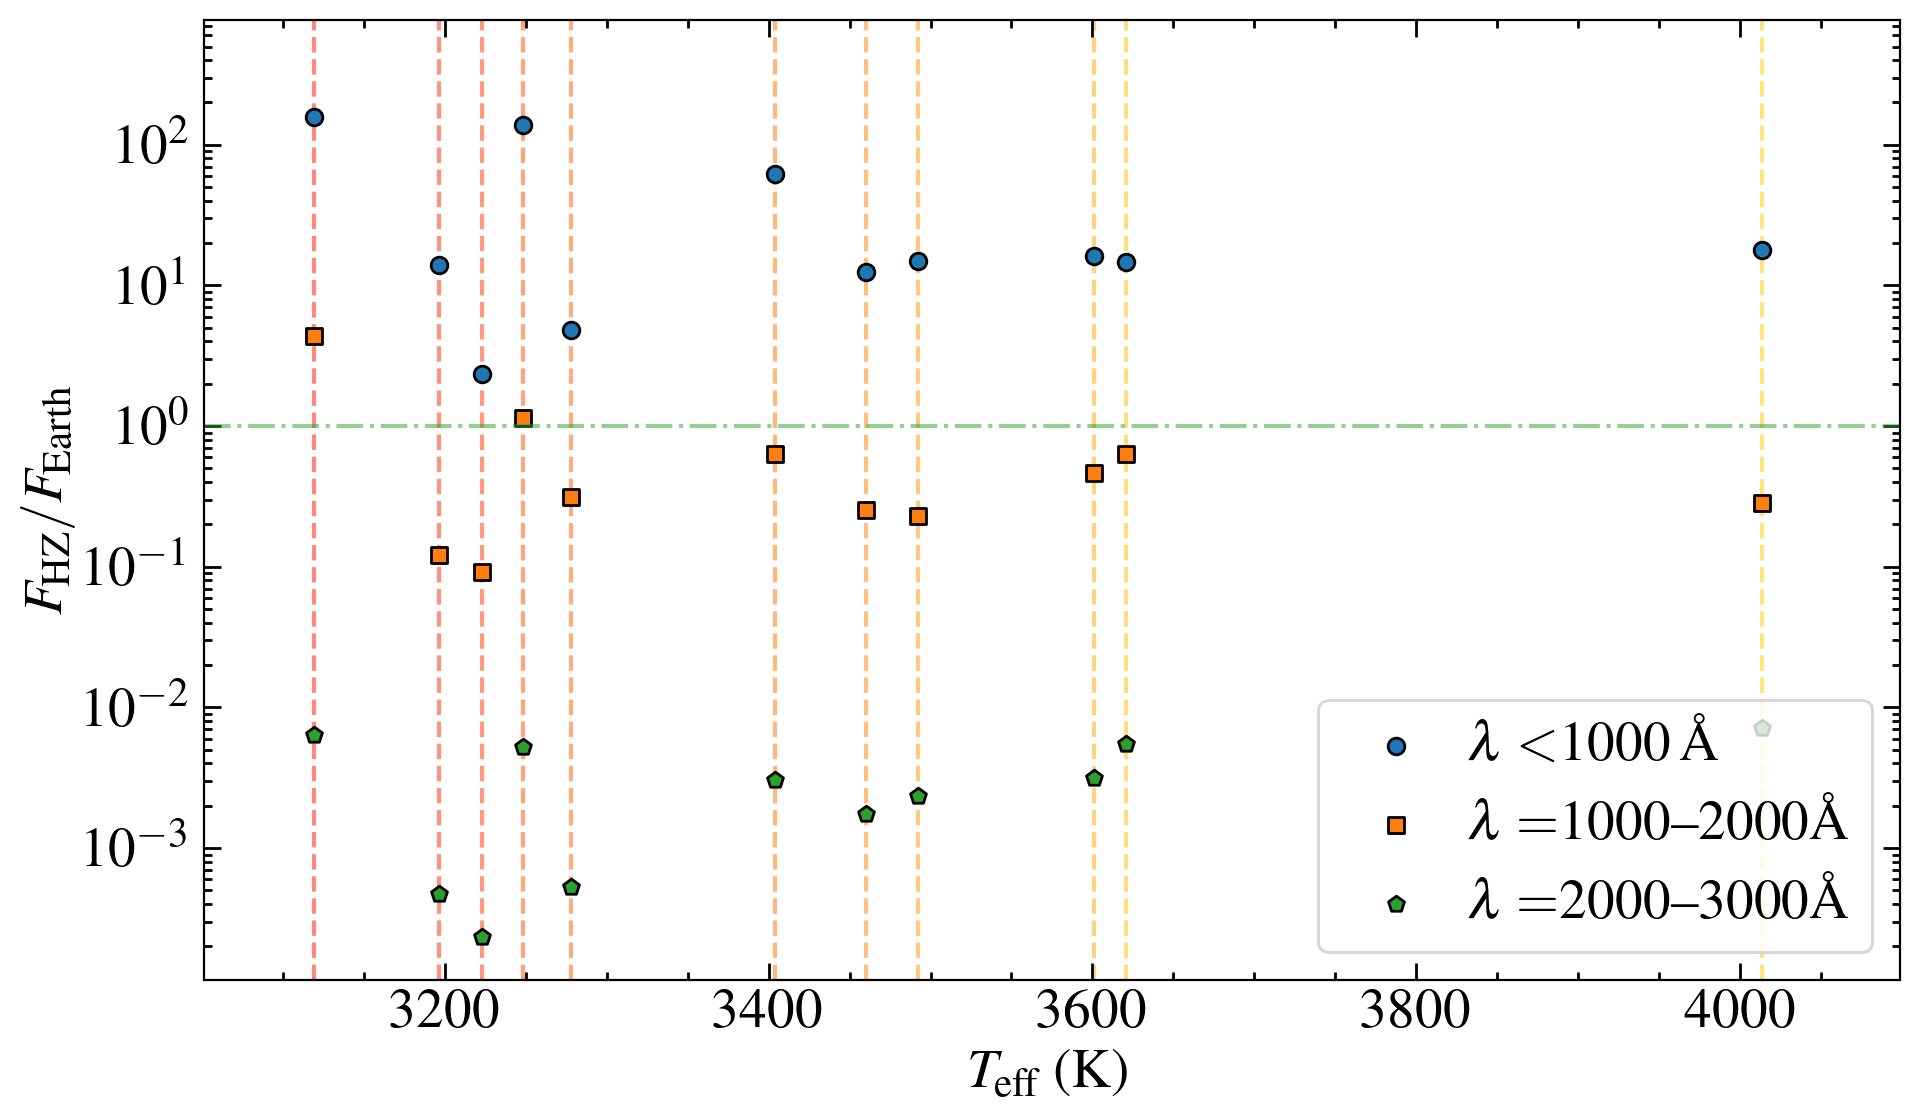

In [83]:
fig, ax = plt.subplots(figsize=(10,6))


hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)

hab_mids =[]
 
for teff in teffs_sort:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
    hab_mid = np.mean([hi, ho])
    hab_mids.append(hab_mid)
    
euv_ratio = []
fuv_ratio = []
nuv_ratio = []
    
for i, star in enumerate(stars_sort):
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    
    scale = (((d_stars[i]*u.pc).to(u.au))/hab_mids[i]*u.au)**2
    euv_ratio.append(euvs[i]*scale.value/euv_earth)
    fuv_ratio.append(fuvs[i]*scale.value/fuv_earth)
    nuv_ratio.append(nuvs[i]*scale.value/nuv_earth)
    
ax.scatter(teffs_sort, euv_ratio, label=r'$\lambda <$1000\,\AA', marker='o', edgecolor='k')      
ax.scatter(teffs_sort, fuv_ratio, label = r'$\lambda = $1000--2000\AA', marker='s', edgecolor='k')      
ax.scatter(teffs_sort, nuv_ratio,  label = r'$\lambda = $2000--3000\AA', marker='p', edgecolor='k')     
ax.set_yscale('log')  

ax.legend(loc=4, frameon=True)
cols = np.linspace(0, 0.8, 12)[::-1]


for i, teff in enumerate(teffs_sort):
    ax.axvline(teff, ls='--', c=plt.cm.autumn(cols[i]), zorder=-1, alpha=0.5)

ax.axhline(1, ls='-.', c='C2', alpha =0.5)

ax.set_xlim(3051, 4099)

ax.set_xlabel('$T_{\mathrm{eff}}$ (K)')
ax.set_ylabel('$F_{\mathrm{HZ}}/F_{\mathrm{Earth}}$')
fig.tight_layout()

fig.savefig('plots/hz_fluxes.pdf')

In [37]:
stars_sort

array(['GJ676A', 'GJ649', 'GJ15A', 'GJ849', 'GJ163', 'GJ674', 'L-980-5',
       'GJ729', 'GJ699', 'GJ1132', 'LHS-2686', '2MASS-J23062928-0502285'],
      dtype='<U23')

In [38]:
params

Target,RAJ2000,DEJ2000,Jmag,J_e,Hmag,H_e,Kmag,K_e,Rmag,R_e,spt,L_bol,L_bol_e,Mass,Mass_e,Radius,Radius_e,Teff,Teff_e,parallax,distance,P_rot_d
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
GJ 1132,153.716027,-47.156796,9.245,0.026,8.666,0.031,8.322,0.027,13.098,0.11,M3.5,1.67e+31,5e+29,0.194,0.005,0.215,0.009,3196,72,83.07,12.03804021,126.59
GJ 676A,262.546646,-51.637012,6.711,0.02,6.082,0.024,5.825,0.029,8.675,0.012,M0,3.404e+32,8.3e+30,0.631,0.017,0.62,0.03,4014,94,63.07,15.85539876,41.2
GJ 15A,4.594036,44.022842,5.252,0.264,4.476,0.2,4.018,0.02,7.9,0.012,M1,8.61e+31,7e+29,0.393,0.009,0.385,0.002,3601,12,280.74,3.562014676,-1.0
GJ 649,254.536873,25.74423,6.448,0.021,5.865,0.02,5.624,0.016,8.685,0.012,M1,1.674e+32,1.7e+30,0.524,0.012,0.531,0.012,3621,41,96.38,10.3755966,-1.0
GJ 163,62.315307,-53.373737,7.948,0.026,7.428,0.04,7.135,0.021,10.734,0.012,M3.5,8.28e+31,2.4e+30,0.405,0.01,0.409,0.017,3460,76,66.59,15.01726986,61.0
GJ 849,332.417906,-4.640765,6.51,0.024,5.899,0.044,5.594,0.017,9.279,0.012,M3.5,1.105e+32,1e+30,0.465,0.011,0.464,0.018,3492,70,113.25,8.830022075,39.2
GJ 674,262.166316,-46.89513,5.711,0.019,5.154,0.033,4.855,0.018,8.337,0.012,M2.5,6.03e+31,1.4e+30,0.353,0.008,0.361,0.012,3404,59,220.24,4.540501271,32.9
GJ 699,269.452044,4.694597,5.244,0.02,4.834,0.034,4.524,0.02,8.298,0.012,M4,1.3e+31,2e+29,0.161,0.004,0.187,0.001,3223,17,548.31,1.823785815,130.4
L 980-5,215.313034,-1.122204,8.948,0.03,8.391,0.031,8.093,0.026,13.02,0.15,M3.5,2.49e+31,8e+29,0.232,0.006,0.25,0.01,3278,74,74.66,13.39405304,92.23


In [39]:
d_stars

[15.85539876,
 10.3755966,
 3.562014676,
 8.830022075,
 15.01726986,
 4.540501271,
 13.39405304,
 2.969826562,
 1.823785815,
 12.03804021,
 13.14060447,
 12.10946961]

[5.122623300829137e-13,
 1.1336441071341437e-12,
 6.583107408173193e-12,
 3.8141635713990747e-13,
 1.269168967266744e-13,
 2.4936737909567147e-12,
 9.185412912336466e-14,
 6.063901693406014e-12,
 1.1604844928326701e-12,
 3.0851351924297385e-14,
 5.946072130505029e-13,
 1.3271442638241792e-14]

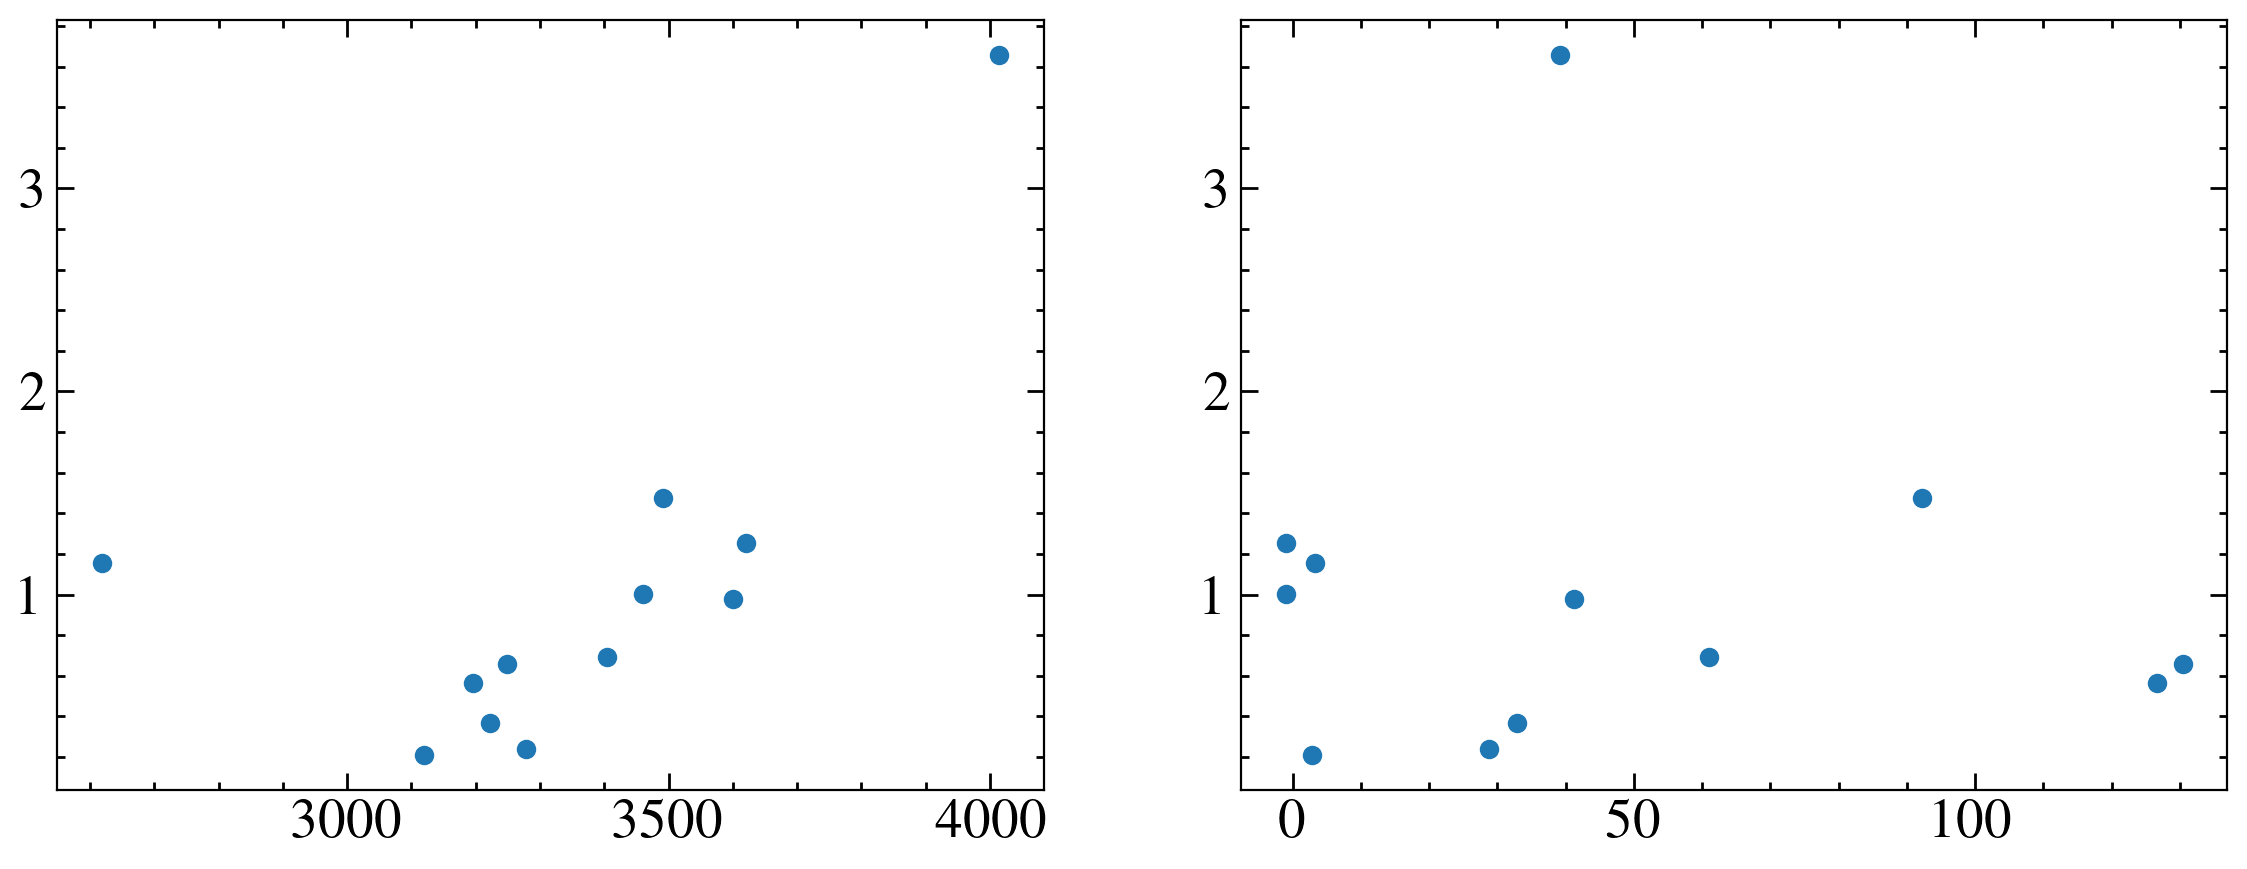

In [58]:
fig, ax = plt.subplots(ncols=2)

fnr = np.array(nuvs)/np.array(fuvs)


ax[0].scatter(teffs_sort, fnr) 
ax[1].scatter(prots_sort, fnr) 

fnearth = nuv_earth/fuv_earth
tsun = 5772 
protsun = 27.26 

# ax[0].scatter(tsun, fnearth)
# ax[1].scatter(protsun, fnearth)


Comparing hottest and coolest not-TRAPPIST-1 compared with the Sun

In [85]:
specs_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hdd

In [107]:
teffs_sort

array([4014, 3621, 3601, 3492, 3460, 3404, 3278, 3248, 3223, 3196, 3119,
       2619])

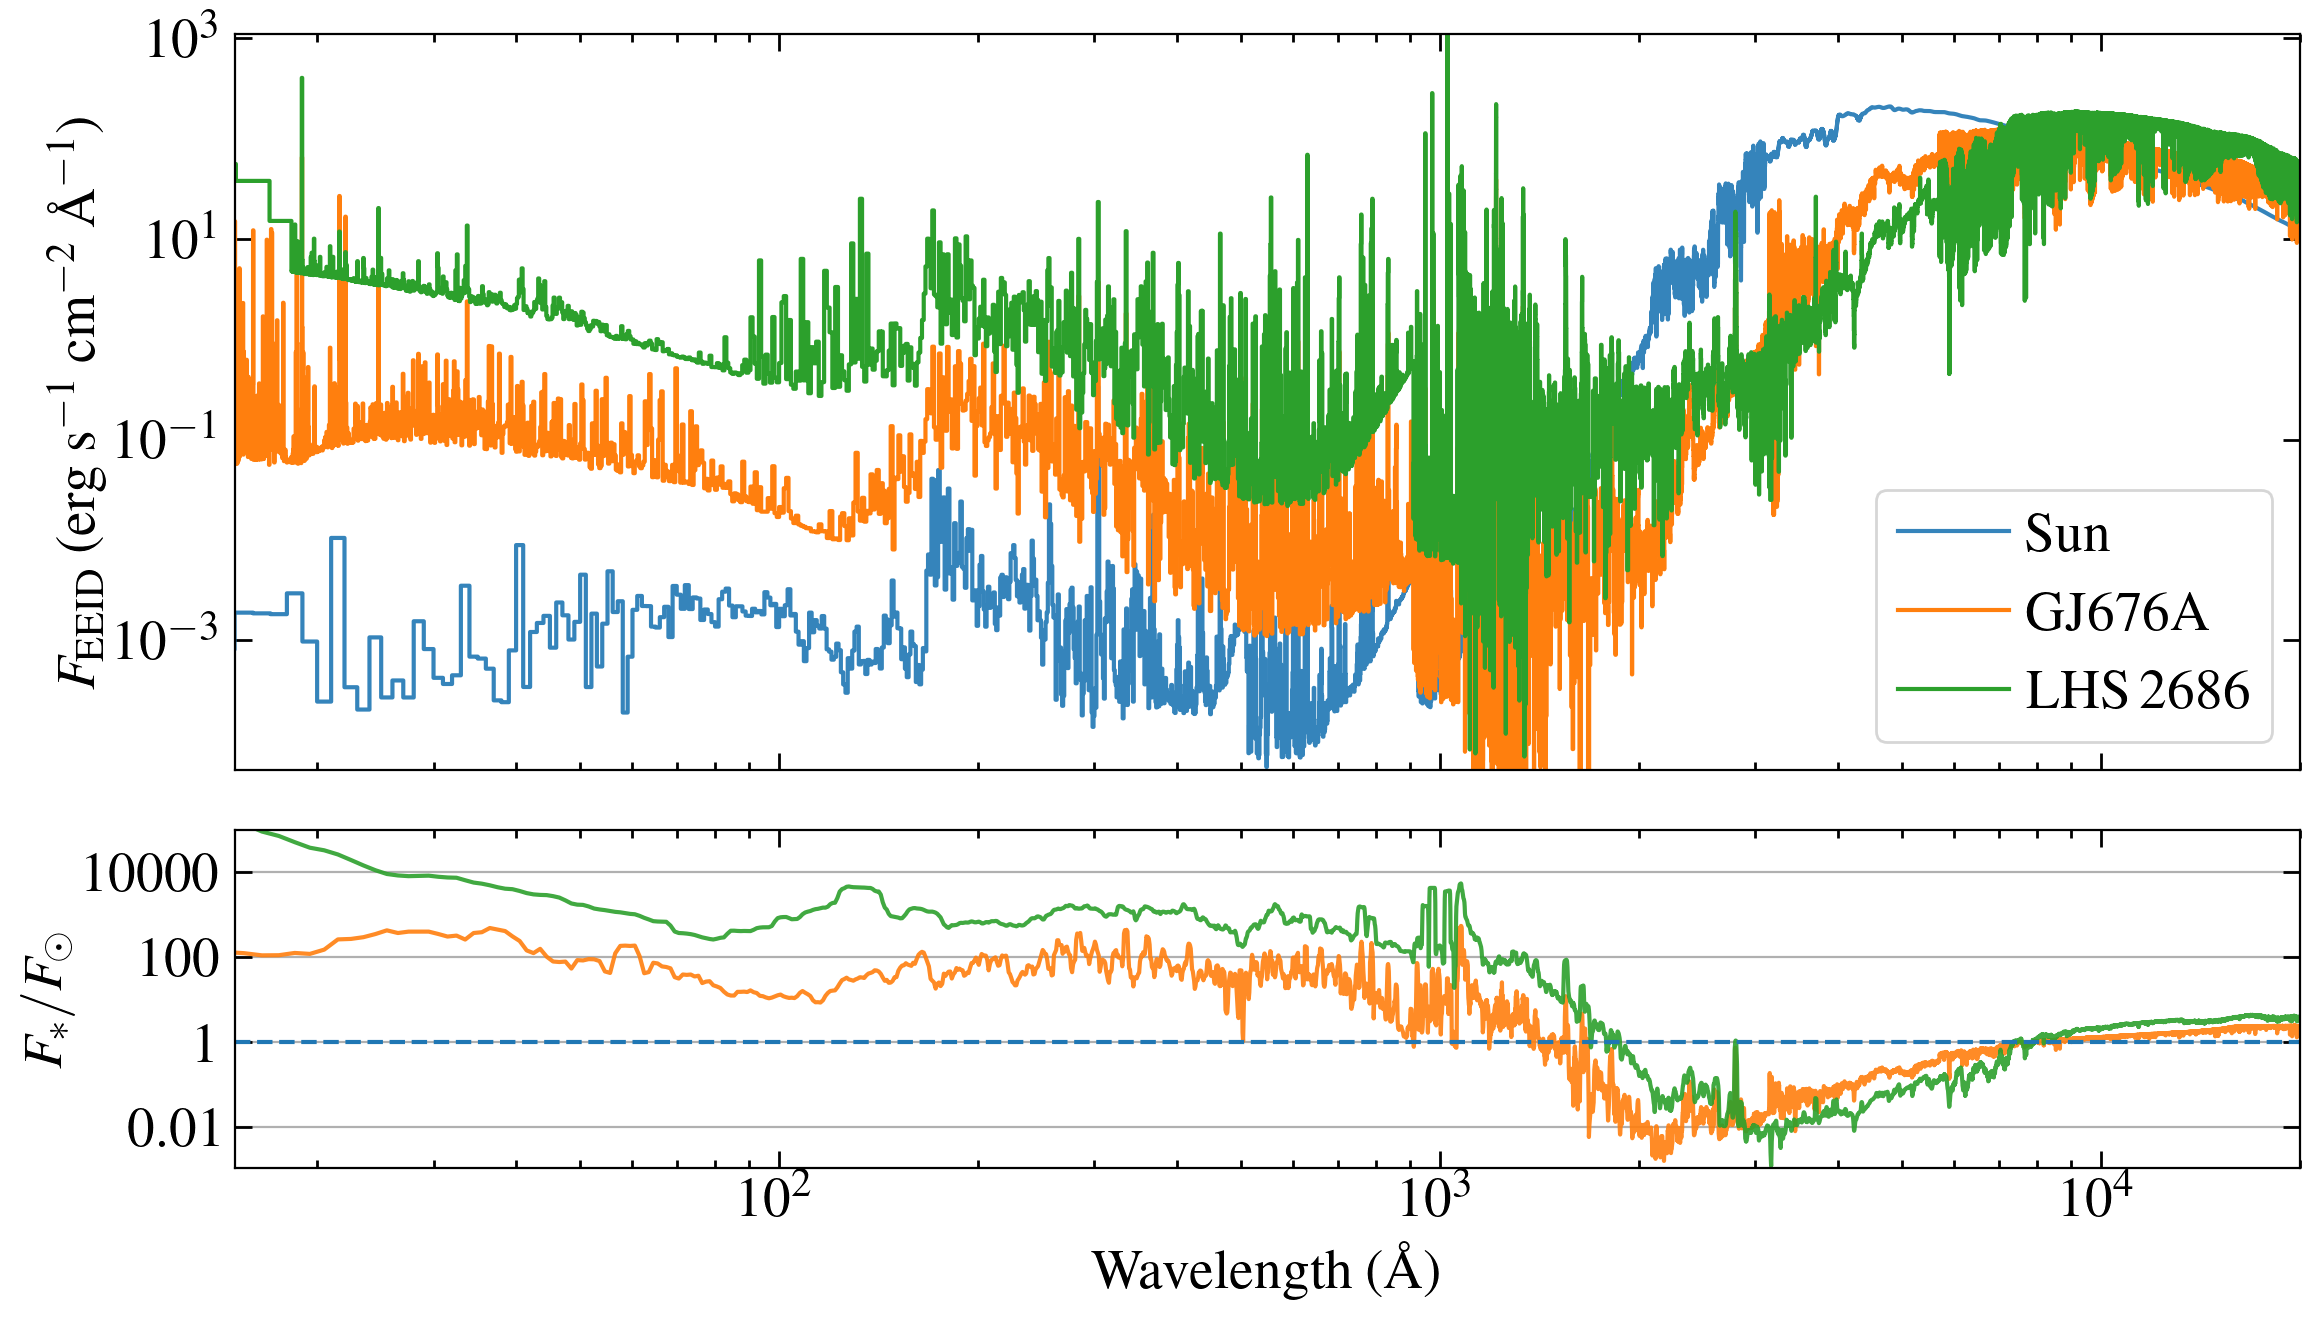

In [164]:
fig, axes = plt.subplot_mosaic([[0],
                               [0],
                               [1]], figsize=(12, 7), sharex=True)

ax = axes[0]

# #add the sun
# dstar = 3.6*u.pc
# dsun = 1*u.au
# lstar = 10**-0.6540
# eeidau = 0.471*u.au

# solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
# starscale = (dstar.to(u.m)/eeidau.to(u.m))**2

ax.step(sw, sf, where='mid', label='Sun', alpha=0.9)



ax.set_ylim(5.1e-5, 1.1e3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(15, 2e4)

#highest t = gj676A

gj676 = fits.getdata(specs_sort[0], 1)
l676 =3.404e32*u.erg/u.s
d676 = 15.85539876*u.pc
eeid676 = (1*u.au)*(l676/(const.L_sun.to(u.erg/u.s)))**0.5
scale676 = (d676.to(u.au)/eeid676)**2
ax.step(gj676['WAVELENGTH'], gj676['FLUX']*scale676, where='mid', label = 'GJ676A')

#lowest t = lhs-2686
lhs = fits.getdata(specs_sort[-2], 1)
llhs =1.08e31*u.erg/u.s
dlhs = 13.14060447*u.pc
eeidlhs = (1*u.au)*(llhs/(const.L_sun.to(u.erg/u.s)))**0.5
scalelhs = (d676.to(u.au)/eeidlhs)**2
ax.step(lhs['WAVELENGTH'], lhs['FLUX']*scalelhs, where='mid', label = 'LHS\,2686')
ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

ax.legend(frameon=True, loc=4)


ax1= axes[1]

mask = (gj676['WAVELENGTH'] > sw[0]) & (gj676['WAVELENGTH'] < sw[-1])
fnew = interpolate.interp1d(gj676['WAVELENGTH'][mask], gj676['FLUX'][mask], fill_value='extrapolate')(sw)
fnew = fnew*scale676
ratio = fnew/sf
ratio = convolve(ratio,Box1DKernel(5))
ax1.plot(sw, ratio, c='C1', alpha=0.9)

mask = (lhs['WAVELENGTH'] > sw[0]) & (lhs['WAVELENGTH'] < sw[-1])
fnew = interpolate.interp1d(lhs['WAVELENGTH'][mask], lhs['FLUX'][mask], fill_value='extrapolate')(sw)
fnew = fnew*scalelhs
ratio = abs(fnew/sf)
ratio = convolve(ratio,Box1DKernel(20))
ax1.plot(sw, ratio, c='C2', alpha=0.9)

ax1.axhline(1, ls='--', c='C0')

ax1.grid(True, which='both', axis='y')
# ax1.plot(sw, sf)
ax1.set_yscale('log')
ax1.set_ylim(1.1e-3, 9.9e4)
ax1.set_yticks([1e-2, 1, 1e2, 1e4], [0.01, 1, 100, 10000])

# ax1.set_xlim(30, 2e4)
ax1.set_xlabel('Wavelength (\AA)')
ax1.set_ylabel('$F_*/F_{\odot}$')

fig.tight_layout()

In [93]:
params

Target,RAJ2000,DEJ2000,Jmag,J_e,Hmag,H_e,Kmag,K_e,Rmag,R_e,spt,L_bol,L_bol_e,Mass,Mass_e,Radius,Radius_e,Teff,Teff_e,parallax,distance,P_rot_d
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
GJ 1132,153.716027,-47.156796,9.245,0.026,8.666,0.031,8.322,0.027,13.098,0.11,M3.5,1.67e+31,5e+29,0.194,0.005,0.215,0.009,3196,72,83.07,12.03804021,126.59
GJ 676A,262.546646,-51.637012,6.711,0.02,6.082,0.024,5.825,0.029,8.675,0.012,M0,3.404e+32,8.3e+30,0.631,0.017,0.62,0.03,4014,94,63.07,15.85539876,41.2
GJ 15A,4.594036,44.022842,5.252,0.264,4.476,0.2,4.018,0.02,7.9,0.012,M1,8.61e+31,7e+29,0.393,0.009,0.385,0.002,3601,12,280.74,3.562014676,-1.0
GJ 649,254.536873,25.74423,6.448,0.021,5.865,0.02,5.624,0.016,8.685,0.012,M1,1.674e+32,1.7e+30,0.524,0.012,0.531,0.012,3621,41,96.38,10.3755966,-1.0
GJ 163,62.315307,-53.373737,7.948,0.026,7.428,0.04,7.135,0.021,10.734,0.012,M3.5,8.28e+31,2.4e+30,0.405,0.01,0.409,0.017,3460,76,66.59,15.01726986,61.0
GJ 849,332.417906,-4.640765,6.51,0.024,5.899,0.044,5.594,0.017,9.279,0.012,M3.5,1.105e+32,1e+30,0.465,0.011,0.464,0.018,3492,70,113.25,8.830022075,39.2
GJ 674,262.166316,-46.89513,5.711,0.019,5.154,0.033,4.855,0.018,8.337,0.012,M2.5,6.03e+31,1.4e+30,0.353,0.008,0.361,0.012,3404,59,220.24,4.540501271,32.9
GJ 699,269.452044,4.694597,5.244,0.02,4.834,0.034,4.524,0.02,8.298,0.012,M4,1.3e+31,2e+29,0.161,0.004,0.187,0.001,3223,17,548.31,1.823785815,130.4
L 980-5,215.313034,-1.122204,8.948,0.03,8.391,0.031,8.093,0.026,13.02,0.15,M3.5,2.49e+31,8e+29,0.232,0.006,0.25,0.01,3278,74,74.66,13.39405304,92.23


In [98]:
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [147]:
len(fnew[fnew <0])

3

In [146]:
ratio

<Quantity [-1.02052902e+19, -1.02052902e+19, -1.02052902e+19, ...,
            4.86537455e+00,  3.80106949e+00,  2.88899214e+00]>

In [120]:
wi

array([4.96036005e+00, 4.96234560e+00, 4.96433258e+00, ...,
       2.39993500e+04, 2.39994000e+04, 2.39994500e+04], dtype='>f8')

In [138]:
sf

4.233799888260789e-19
3.348200189323691e-11
1.4678999349371225e-08
3.349599921875779e-07
2.202099949499825e-06
1.1398000424378552e-05
5.949499973212369e-05
4.2381001549074426e-05
4.6781999117229134e-05
...
6.19320011138916
